In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [78]:
df= pd.read_csv("Star.csv")
df.drop(columns=['rownames'])

rename = { "tmathssk" : "scaled_math_score",
"treadssk": "scaled_reading_score",
"classk": "class_type",
"totexpk": "teaching_exp",
"freelunk": "free_lunch",
"schidkn": "sid",}

df.rename(columns = rename, inplace=True)

In [79]:
df.head()

,rownames,scaled_math_score,scaled_reading_score,class_type,teaching_exp,sex,free_lunch,race,sid
0,2,473,447,small.class,7,girl,no,white,63
1,3,536,450,small.class,21,girl,no,black,20
2,5,463,439,regular.with.aide,0,boy,yes,black,19
3,11,559,448,regular,16,boy,no,white,69
4,12,489,447,small.class,5,boy,yes,white,79


# Teacher experience Binning

There are various types of binning available:
1. Unsupervised Binnning
    - Equal width binning: (max-min)/no. of bins 
    - equal frequency binning/ quantile binning 
    - K means binning
2. Supervised Binning
    - Decision Tree Binning
3. Custom Binning

In [80]:
from sklearn.preprocessing import KBinsDiscretizer

In [81]:
num_classes_teaching_exp = 5

kbins_teaching_exp_uniform = KBinsDiscretizer(n_bins=num_classes_teaching_exp, encode='ordinal', strategy='uniform')
kbins_teaching_exp_quantile = KBinsDiscretizer(n_bins=num_classes_teaching_exp, encode='ordinal', strategy='quantile')
kbins_teaching_exp_kmeans = KBinsDiscretizer(n_bins=num_classes_teaching_exp, encode='ordinal', strategy='kmeans')

In [82]:
# Making teaching experience bins uisng transformation bins

df['teaching_exp_uniform'] = kbins_teaching_exp_uniform.fit_transform(df[['teaching_exp']])
df['teaching_exp_quantile'] = kbins_teaching_exp_quantile.fit_transform(df[['teaching_exp']])
df['teaching_exp_kmeans'] = kbins_teaching_exp_kmeans.fit_transform(df[['teaching_exp']])

In [83]:
kbins_teaching_exp_kmeans.bin_edges_

array([array([ 0.        ,  5.24796598, 10.2599455 , 15.43922001, 21.03850256,
              27.        ])                                                   ],
      dtype=object)

In [84]:
kbins_teaching_exp_uniform.bin_edges_

array([array([ 0. ,  5.4, 10.8, 16.2, 21.6, 27. ])], dtype=object)

In [85]:
kbins_teaching_exp_kmeans.bin_edges_

array([array([ 0.        ,  5.24796598, 10.2599455 , 15.43922001, 21.03850256,
              27.        ])                                                   ],
      dtype=object)

In [86]:
df.head()

,rownames,scaled_math_score,scaled_reading_score,class_type,teaching_exp,sex,free_lunch,race,sid,teaching_exp_uniform,teaching_exp_quantile,teaching_exp_kmeans
0,2,473,447,small.class,7,girl,no,white,63,1.0,1.0,1.0
1,3,536,450,small.class,21,girl,no,black,20,3.0,4.0,3.0
2,5,463,439,regular.with.aide,0,boy,yes,black,19,0.0,0.0,0.0
3,11,559,448,regular,16,boy,no,white,69,2.0,4.0,3.0
4,12,489,447,small.class,5,boy,yes,white,79,0.0,1.0,0.0


# Combining the Scores

In [87]:
df["scaled_combined_score"] = (df["scaled_math_score"] + df["scaled_reading_score"])/2

In [88]:
df.describe()

,rownames,scaled_math_score,scaled_reading_score,teaching_exp,sid,teaching_exp_uniform,teaching_exp_quantile,teaching_exp_kmeans,scaled_combined_score
count,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000
mean,5752.660404,485.648051,436.742345,9.307411,39.836639,1.281315,2.051148,1.303932,461.195198
std,3329.971901,47.771531,31.772857,5.767700,22.957552,1.050832,1.415994,1.076509,36.938249
min,2.000000,320.000000,315.000000,0.000000,1.000000,0.000000,0.000000,0.000000,317.500000
25%,2884.750000,454.000000,414.000000,5.000000,20.000000,0.000000,1.000000,0.000000,435.000000
50%,5733.500000,484.000000,433.000000,9.000000,39.000000,1.000000,2.000000,1.000000,457.500000
75%,8624.250000,513.000000,453.000000,13.000000,60.000000,2.000000,3.000000,2.000000,482.000000
max,11598.000000,626.000000,627.000000,27.000000,80.000000,4.000000,4.000000,4.000000,626.500000


In [89]:
df.head()

,rownames,scaled_math_score,scaled_reading_score,class_type,teaching_exp,sex,free_lunch,race,sid,teaching_exp_uniform,teaching_exp_quantile,teaching_exp_kmeans,scaled_combined_score
0,2,473,447,small.class,7,girl,no,white,63,1.0,1.0,1.0,460.0
1,3,536,450,small.class,21,girl,no,black,20,3.0,4.0,3.0,493.0
2,5,463,439,regular.with.aide,0,boy,yes,black,19,0.0,0.0,0.0,451.0
3,11,559,448,regular,16,boy,no,white,69,2.0,4.0,3.0,503.5
4,12,489,447,small.class,5,boy,yes,white,79,0.0,1.0,0.0,468.0


The standard deviation in scaled_maths_score, scaled_reading_score and scaled_combined_score are 47.77, 31.77 and 36.93 respectively. which are close enough to the the standard deviation within the races 

In [90]:
grp_race = df.groupby(['race'])

grp_race.describe()[['scaled_math_score', 'scaled_reading_score', 'scaled_combined_score']].T

race                               black       other        white
scaled_math_score     count  1852.000000   27.000000  3869.000000
                      mean    473.558855  480.259259   491.472474
                      std      48.593911   51.800351    46.244646
                      min     320.000000  384.000000   320.000000
                      25%     439.000000  446.500000   459.000000
                      50%     468.000000  468.000000   489.000000
                      75%     500.000000  513.000000   520.000000
                      max     626.000000  602.000000   626.000000
scaled_reading_score  count  1852.000000   27.000000  3869.000000
                      mean    428.930886  440.962963   440.452055
                      std      28.784011   38.768030    32.407215
                      min     346.000000  384.000000   315.000000
                      25%     410.000000  413.500000   419.000000
                      50%     424.000000  436.000000   436.000000
                      75%     443.000000  456.500000   456.000000
                      max     627.000000  565.000000   627.000000
scaled_combined_score count  1852.000000   27.000000  3869.000000
                      mean    451.244870  460.611111   465.962264
                      std      36.087996   41.558192    36.363118
                      min     340.000000  384.000000   317.500000
                      25%     426.500000  432.500000   440.500000
                      50%     446.250000  459.500000   462.500000
                      75%     471.500000  490.500000   486.500000
                      max     626.500000  546.500000   626.500000

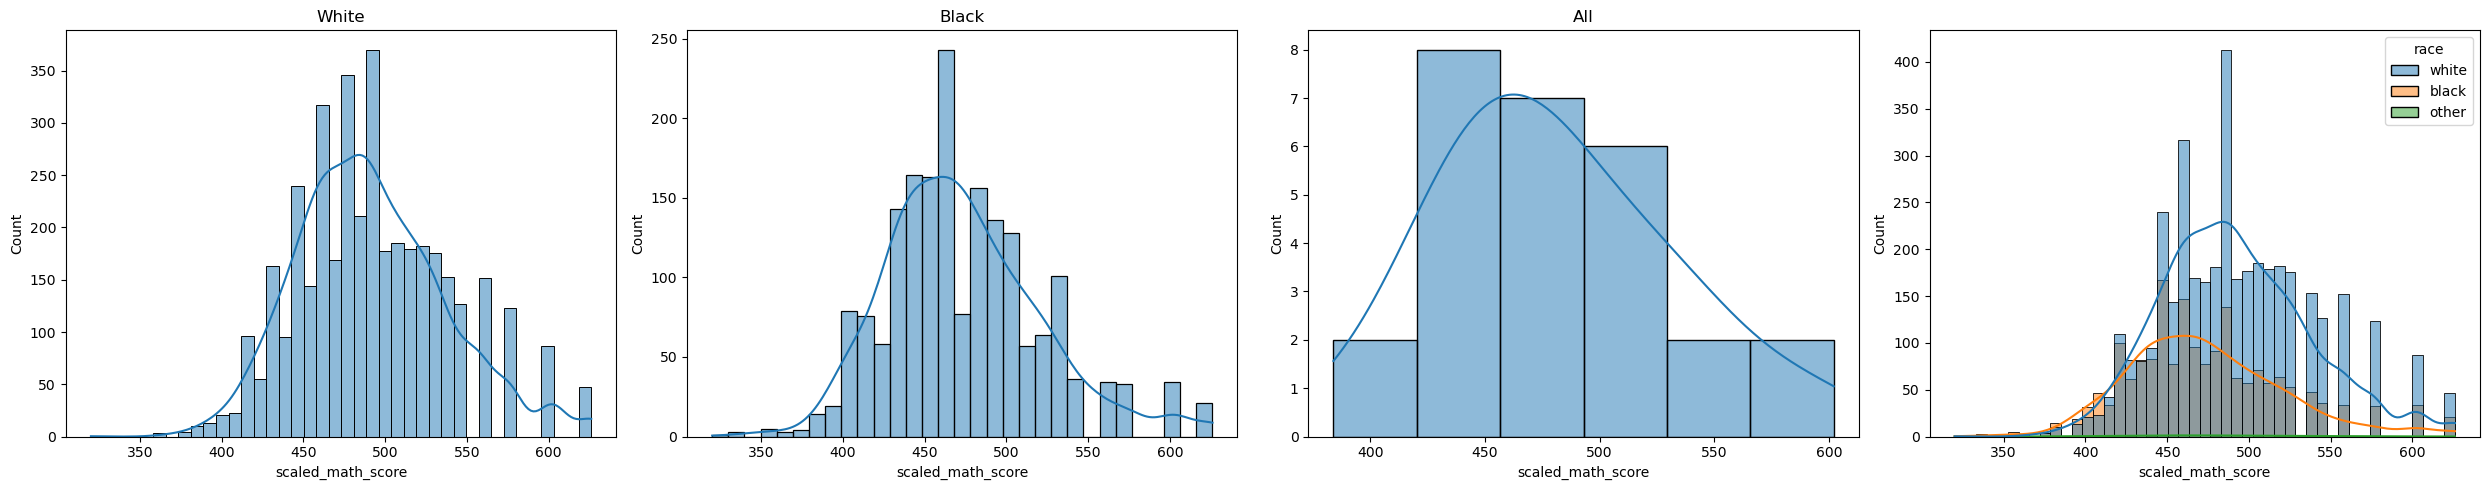

In [91]:
white = df[df['race'] == 'white']['scaled_math_score']
black = df[df['race'] == 'black']['scaled_math_score']
other = df[df['race'] == 'other']['scaled_math_score']

fig, axes = plt.subplots(1, 4, figsize=(25, 5))

sns.histplot(white, kde=True, ax=axes[0])
axes[0].set_title('White')

sns.histplot(black, kde=True, ax=axes[1])
axes[1].set_title('Black')

sns.histplot(other, kde=True, ax=axes[2])
axes[2].set_title('Other')

sns.histplot(df, x='scaled_math_score', kde=True, hue='race', ax=axes[3])
axes[2].set_title('All')

plt.tight_layout()
plt.show()

In [92]:
spc_format = ols('scaled_math_score ~ race', data=df[['scaled_math_score', 'race']]).fit()

sm.stats.anova_lm(spc_format)

,df,sum_sq,mean_sq,F,PR(>F)
race,2.0,4.027029e+05,201351.459895,90.993255,1.244889e-39
Residual,5745.0,1.271264e+07,2212.817422,NaN,NaN


# Reaching experience bins on maths score

In [93]:
grp_uniform_teaching_exp = df.groupby(['teaching_exp_uniform'])

grp_uniform_teaching_exp.describe()[['scaled_math_score', 'scaled_reading_score', 'scaled_combined_score']].T

teaching_exp_uniform                 0.0          1.0          2.0  \
scaled_math_score     count  1656.000000  1595.000000  1881.000000   
                      mean    482.037440   482.895298   489.037214   
                      std      46.994965    48.203195    47.166384   
                      min     320.000000   320.000000   339.000000   
                      25%     449.000000   449.000000   459.000000   
                      50%     478.000000   478.000000   484.000000   
                      75%     513.000000   513.000000   520.000000   
                      max     626.000000   626.000000   626.000000   
scaled_reading_score  count  1656.000000  1595.000000  1881.000000   
                      mean    433.464976   434.319122   440.672515   
                      std      31.175499    30.673786    32.599735   
                      min     315.000000   360.000000   370.000000   
                      25%     411.000000   413.000000   419.000000   
                      50%     430.000000   430.000000   437.000000   
                      75%     448.000000   450.000000   456.000000   
                      max     627.000000   605.000000   627.000000   
scaled_combined_score count  1656.000000  1595.000000  1881.000000   
                      mean    457.751208   458.607210   464.854864   
                      std      36.391003    36.610163    37.098441   
                      min     317.500000   340.000000   359.500000   
                      25%     432.000000   433.000000   439.500000   
                      50%     454.250000   455.000000   461.500000   
                      75%     477.000000   480.500000   487.500000   
                      max     626.500000   603.000000   626.500000   

teaching_exp_uniform                3.0         4.0  
scaled_math_score     count  456.000000  160.000000  
                      mean   489.695175  499.081250  
                      std     46.958823   54.896125  
                      min    365.000000  384.000000  
                      25%    459.000000  459.000000  
                      50%    486.500000  489.000000  
                      75%    513.000000  536.000000  
                      max    626.000000  626.000000  
scaled_reading_score  count  456.000000  160.000000  
                      mean   440.109649  439.018750  
                      std     32.337999   31.465559  
                      min    358.000000  382.000000  
                      25%    418.000000  418.000000  
                      50%    434.000000  433.000000  
                      75%    458.000000  448.500000  
                      max    627.000000  554.000000  
scaled_combined_score count  456.000000  160.000000  
                      mean   464.902412  469.050000  
                      std     36.059060   40.633977  
                      min    371.000000  397.500000  
                      25%    439.375000  441.625000  
                      50%    460.000000  461.750000  
                      75%    483.625000  486.625000  
                      max    626.500000  585.500000

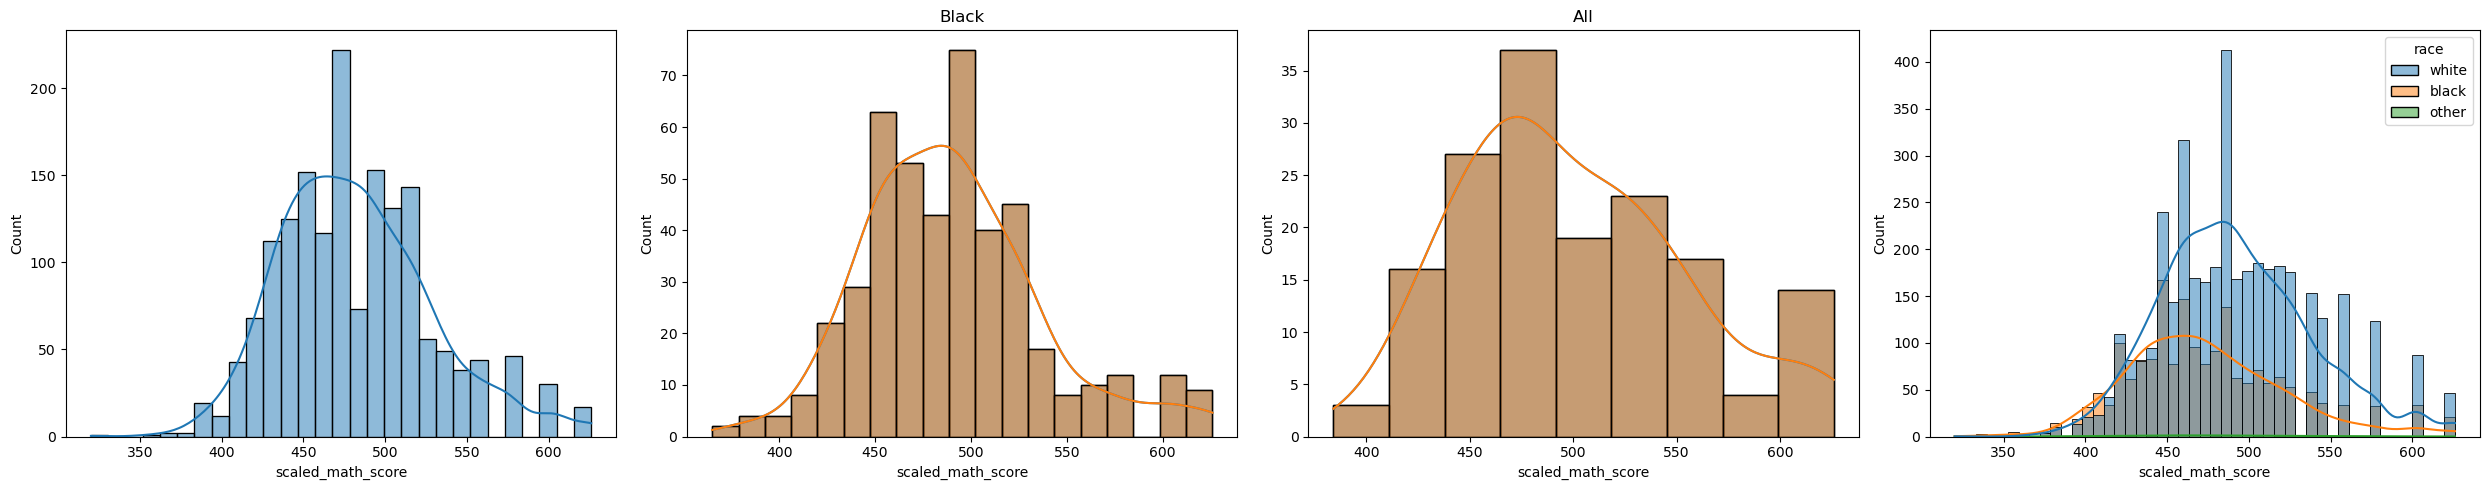

In [94]:
white = df[df['teaching_exp_uniform'] == 0]['scaled_math_score']
black = df[df['teaching_exp_uniform'] == 1]['scaled_math_score']
other = df[df['teaching_exp_uniform'] == 2]['scaled_math_score']
black = df[df['teaching_exp_uniform'] == 3]['scaled_math_score']
other = df[df['teaching_exp_uniform'] == 4]['scaled_math_score']

fig, axes = plt.subplots(1, 4, figsize=(25, 5))

sns.histplot(white, kde=True, ax=axes[0])
axes[1].set_title('Black')

sns.histplot(black, kde=True, ax=axes[1])
axes[1].set_title('Black')

sns.histplot(other, kde=True, ax=axes[2])
axes[2].set_title('Other')

sns.histplot(black, kde=True, ax=axes[1])
axes[1].set_title('Black')

sns.histplot(other, kde=True, ax=axes[2])
axes[2].set_title('Other')

sns.histplot(df, x='scaled_math_score', kde=True, hue='race', ax=axes[3])
axes[2].set_title('All')

plt.tight_layout()
plt.show()

In [95]:
kbins_teaching_exp_uniform.bin_edges_[0][0] 

0.0

In [96]:
spc_format = ols('scaled_math_score ~ teaching_exp_uniform', data=df[['scaled_math_score', 'teaching_exp_uniform']]).fit()

sm.stats.anova_lm(spc_format)

,df,sum_sq,mean_sq,F,PR(>F)
teaching_exp_uniform,1.0,7.972432e+04,79724.322591,35.141876,3.243640e-09
Residual,5746.0,1.303561e+07,2268.641609,NaN,NaN


In [97]:
grp_quantile_teaching_exp = df.groupby(['teaching_exp_quantile'])

grp_quantile_teaching_exp.describe()[['scaled_math_score', 'scaled_reading_score', 'scaled_combined_score']].T

teaching_exp_quantile                0.0          1.0          2.0  \
scaled_math_score     count  1117.000000  1120.000000  1014.000000   
                      mean    479.856759   483.733929   483.915187   
                      std      47.193579    49.680667    45.535497   
                      min     320.000000   320.000000   354.000000   
                      25%     444.000000   449.000000   454.000000   
                      50%     473.000000   478.000000   478.000000   
                      75%     513.000000   513.000000   513.000000   
                      max     626.000000   626.000000   626.000000   
scaled_reading_score  count  1117.000000  1120.000000  1014.000000   
                      mean    431.831692   434.294643   435.691321   
                      std      30.203645    31.120033    31.401618   
                      min     315.000000   360.000000   378.000000   
                      25%     411.000000   413.000000   414.000000   
                      50%     428.000000   430.000000   431.000000   
                      75%     447.000000   451.000000   450.000000   
                      max     627.000000   627.000000   605.000000   
scaled_combined_score count  1117.000000  1120.000000  1014.000000   
                      mean    455.844226   459.014286   459.803254   
                      std      36.136786    37.836755    35.266424   
                      min     317.500000   340.000000   372.500000   
                      25%     430.000000   432.000000   435.500000   
                      50%     452.000000   456.000000   455.750000   
                      75%     475.000000   481.000000   480.000000   
                      max     601.500000   626.500000   603.000000   

teaching_exp_quantile                3.0          4.0  
scaled_math_score     count  1346.000000  1151.000000  
                      mean    484.748886   495.708949  
                      std      46.093223    48.880115  
                      min     339.000000   365.000000  
                      25%     454.000000   459.000000  
                      50%     484.000000   489.000000  
                      75%     513.000000   528.000000  
                      max     626.000000   626.000000  
scaled_reading_score  count  1346.000000  1151.000000  
                      mean    436.791976   444.757602  
                      std      30.901471    33.724683  
                      min     374.000000   358.000000  
                      25%     416.000000   422.000000  
                      50%     433.000000   439.000000  
                      75%     453.000000   461.000000  
                      max     605.000000   627.000000  
scaled_combined_score count  1346.000000  1151.000000  
                      mean    460.770431   470.233275  
                      std      35.822628    38.023552  
                      min     359.500000   371.000000  
                      25%     435.500000   444.000000  
                      50%     457.500000   465.500000  
                      75%     482.000000   491.500000  
                      max     603.000000   626.500000

In [98]:
spc_format = ols('scaled_math_score ~ teaching_exp_quantile', data=df[['scaled_math_score', 'teaching_exp_quantile']]).fit()

sm.stats.anova_lm(spc_format)

,df,sum_sq,mean_sq,F,PR(>F)
teaching_exp_quantile,1.0,1.190085e+05,119008.457374,52.61659,4.590873e-13
Residual,5746.0,1.299633e+07,2261.804830,NaN,NaN


In [99]:
grp_kmeans_teaching_exp = df.groupby(['teaching_exp_kmeans'])

grp_kmeans_teaching_exp.describe()[['scaled_math_score', 'scaled_reading_score', 'scaled_combined_score']].T

teaching_exp_kmeans                  0.0          1.0          2.0  \
scaled_math_score     count  1656.000000  1595.000000  1751.000000   
                      mean    482.037440   482.895298   488.117076   
                      std      46.994965    48.203195    47.174890   
                      min     320.000000   320.000000   339.000000   
                      25%     449.000000   449.000000   456.500000   
                      50%     478.000000   478.000000   484.000000   
                      75%     513.000000   513.000000   520.000000   
                      max     626.000000   626.000000   626.000000   
scaled_reading_score  count  1656.000000  1595.000000  1751.000000   
                      mean    433.464976   434.319122   439.640777   
                      std      31.175499    30.673786    32.119518   
                      min     315.000000   360.000000   370.000000   
                      25%     411.000000   413.000000   418.000000   
                      50%     430.000000   430.000000   436.000000   
                      75%     448.000000   450.000000   456.000000   
                      max     627.000000   605.000000   627.000000   
scaled_combined_score count  1656.000000  1595.000000  1751.000000   
                      mean    457.751208   458.607210   463.878926   
                      std      36.391003    36.610163    36.915149   
                      min     317.500000   340.000000   359.500000   
                      25%     432.000000   433.000000   438.750000   
                      50%     454.250000   455.000000   460.500000   
                      75%     477.000000   480.500000   486.000000   
                      max     626.500000   603.000000   626.500000   

teaching_exp_kmeans                 3.0         4.0  
scaled_math_score     count  586.000000  160.000000  
                      mean   492.298635  499.081250  
                      std     46.842503   54.896125  
                      min    365.000000  384.000000  
                      25%    459.000000  459.000000  
                      50%    489.000000  489.000000  
                      75%    520.000000  536.000000  
                      max    626.000000  626.000000  
scaled_reading_score  count  586.000000  160.000000  
                      mean   443.317406  439.018750  
                      std     33.653360   31.465559  
                      min    358.000000  382.000000  
                      25%    419.000000  418.000000  
                      50%    439.000000  433.000000  
                      75%    461.000000  448.500000  
                      max    627.000000  554.000000  
scaled_combined_score count  586.000000  160.000000  
                      mean   467.808020  469.050000  
                      std     36.689926   40.633977  
                      min    371.000000  397.500000  
                      25%    441.625000  441.625000  
                      50%    462.500000  461.750000  
                      75%    489.000000  486.625000  
                      max    626.500000  585.500000

In [100]:
spc_format = ols('scaled_math_score ~ teaching_exp_kmeans', data=df[['scaled_math_score', 'teaching_exp_kmeans']]).fit()

sm.stats.anova_lm(spc_format)

,df,sum_sq,mean_sq,F,PR(>F)
teaching_exp_kmeans,1.0,9.045751e+04,90457.513918,39.905843,2.865129e-10
Residual,5746.0,1.302488e+07,2266.773668,NaN,NaN


In [101]:
spc_format = ols('scaled_combined_score ~ class_type', data=df[['scaled_combined_score', 'class_type']]).fit()

sm.stats.anova_lm(spc_format)

,df,sum_sq,mean_sq,F,PR(>F)
class_type,2.0,5.796135e+04,28980.676432,21.390791,5.552856e-10
Residual,5745.0,7.783442e+06,1354.820215,NaN,NaN


In [102]:
df.corr

<bound method DataFrame.corr of       rownames  scaled_math_score  scaled_reading_score         class_type  \
0            2                473                   447        small.class   
1            3                536                   450        small.class   
2            5                463                   439  regular.with.aide   
3           11                559                   448            regular   
4           12                489                   447        small.class   
...        ...                ...                   ...                ...   
5743     11593                468                   422        small.class   
5744     11594                559                   483        small.class   
5745     11595                513                   437            regular   
5746     11597                478                   431            regular   
5747     11598                449                   421  regular.with.aide   

      teaching_exp   sex free_l

In [103]:
spc_format = ols('scaled_math_score ~ class_type', data=df[['scaled_math_score', 'class_type']]).fit()

sm.stats.anova_lm(spc_format)

,df,sum_sq,mean_sq,F,PR(>F)
class_type,2.0,8.416573e+04,42082.864563,18.5529,9.300086e-09
Residual,5745.0,1.303117e+07,2268.263408,NaN,NaN


In [104]:
df['class_type'].value_counts()

class_type
regular.with.aide    2015
regular              2000
small.class          1733
Name: count, dtype: int64

In [105]:
df.head()

,rownames,scaled_math_score,scaled_reading_score,class_type,teaching_exp,sex,free_lunch,race,sid,teaching_exp_uniform,teaching_exp_quantile,teaching_exp_kmeans,scaled_combined_score
0,2,473,447,small.class,7,girl,no,white,63,1.0,1.0,1.0,460.0
1,3,536,450,small.class,21,girl,no,black,20,3.0,4.0,3.0,493.0
2,5,463,439,regular.with.aide,0,boy,yes,black,19,0.0,0.0,0.0,451.0
3,11,559,448,regular,16,boy,no,white,69,2.0,4.0,3.0,503.5
4,12,489,447,small.class,5,boy,yes,white,79,0.0,1.0,0.0,468.0


<Axes: xlabel='sid', ylabel='Count'>

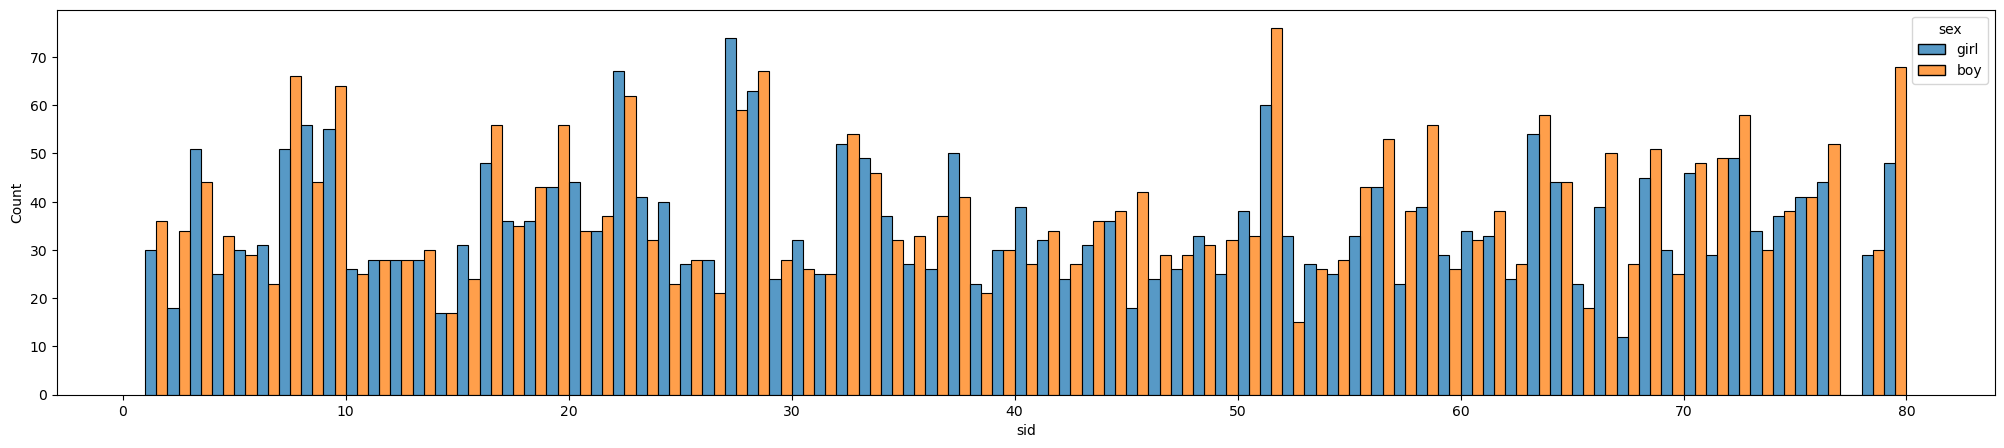

In [106]:
plt.figure(figsize=(25, 5)) 
sns.histplot(df, x ='sid', bins=79, hue='sex', multiple='dodge')

In [107]:
g = df.groupby('sid')

In [108]:
g.get_group(1).sort_values(by='scaled_combined_score', ascending=False).head(10)

,rownames,scaled_math_score,scaled_reading_score,class_type,teaching_exp,sex,free_lunch,race,sid,teaching_exp_uniform,teaching_exp_quantile,teaching_exp_kmeans,scaled_combined_score
403,833,626,565,small.class,14,boy,no,white,1,2.0,4.0,2.0,595.5
3070,6096,559,487,small.class,14,girl,no,white,1,2.0,4.0,2.0,523.0
1471,2951,576,458,small.class,14,girl,no,white,1,2.0,4.0,2.0,517.0
3016,6002,576,456,small.class,14,boy,no,white,1,2.0,4.0,2.0,516.0
1172,2360,506,507,regular,5,girl,no,white,1,0.0,1.0,0.0,506.5
4245,8490,559,453,small.class,14,girl,yes,white,1,2.0,4.0,2.0,506.0
108,233,536,474,regular,10,girl,no,white,1,1.0,2.0,1.0,505.0
2643,5260,528,480,small.class,14,girl,no,white,1,2.0,4.0,2.0,504.0
70,165,536,472,regular,5,boy,no,white,1,0.0,1.0,0.0,504.0
1983,3950,547,456,small.class,14,boy,no,white,1,2.0,4.0,2.0,501.5


In [109]:
list_of_dfs = []

for i in range(80):
    try:
        list_of_dfs.append(g.get_group(i).sort_values(by='scaled_combined_score', ascending=False).head(10))
    except KeyError as e:
        pass
        
top_performers = pd.concat(list_of_dfs, axis=0, ignore_index=True)
comparision = top_performers.copy()
top_performers['top_performers'] = 1

In [110]:
list_of_dfs = []

for i in range(80):
    try:
        list_of_dfs.append(g.get_group(i).sort_values(by='scaled_combined_score').head(10))
    except KeyError as e:
        pass

worse_performers = pd.concat(list_of_dfs, axis=0, ignore_index=True)   
worse_performers['top_performers'] = 0

In [111]:
performance = pd.concat([top_performers, worse_performers], ignore_index=True)

<Axes: xlabel='class_type', ylabel='scaled_math_score'>

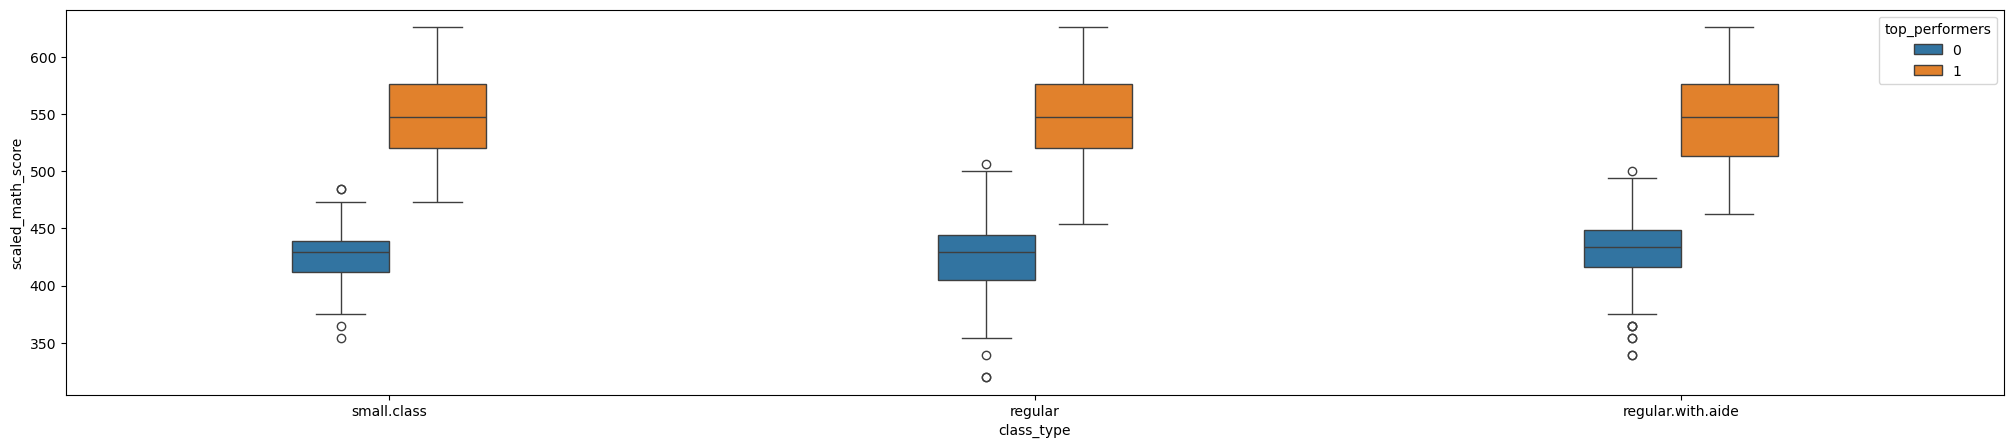

In [112]:
plt.figure(figsize=(25, 5)) 
sns.boxplot(performance,x = 'class_type', y = 'scaled_math_score', hue='top_performers' ,width=0.3)

In [113]:
comparision

,rownames,scaled_math_score,scaled_reading_score,class_type,teaching_exp,sex,free_lunch,race,sid,teaching_exp_uniform,teaching_exp_quantile,teaching_exp_kmeans,scaled_combined_score
0,833,626,565,small.class,14,boy,no,white,1,2.0,4.0,2.0,595.5
1,6096,559,487,small.class,14,girl,no,white,1,2.0,4.0,2.0,523.0
2,2951,576,458,small.class,14,girl,no,white,1,2.0,4.0,2.0,517.0
3,6002,576,456,small.class,14,boy,no,white,1,2.0,4.0,2.0,516.0
4,2360,506,507,regular,5,girl,no,white,1,0.0,1.0,0.0,506.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,6537,547,480,small.class,12,girl,yes,white,79,2.0,3.0,2.0,513.5
776,9775,528,478,regular,13,girl,no,white,79,2.0,3.0,2.0,503.0
777,1441,547,458,regular,13,girl,no,white,79,2.0,3.0,2.0,502.5
778,9293,576,424,small.class,5,girl,no,white,79,0.0,1.0,0.0,500.0


In [114]:
rename = { "scaled_math_score": "scaled_math_score_top",
"scaled_reading_score": "scaled_reading_score_top",
"scaled_combined_score": "scaled_combined_score_top" 
}

comparision.rename(columns = rename, inplace=True)

comparision["scaled_math_score_bottom"] = worse_performers['scaled_math_score']
comparision["scaled_reading_score_bottom"] = worse_performers['scaled_reading_score']
comparision["scaled_combined_score_bottom"] = worse_performers['scaled_combined_score']

In [115]:
comparision

,rownames,scaled_math_score_top,scaled_reading_score_top,class_type,teaching_exp,sex,free_lunch,race,sid,teaching_exp_uniform,teaching_exp_quantile,teaching_exp_kmeans,scaled_combined_score_top,scaled_math_score_bottom,scaled_reading_score_bottom,scaled_combined_score_bottom
0,833,626,565,small.class,14,boy,no,white,1,2.0,4.0,2.0,595.5,418,400,409.0
1,6096,559,487,small.class,14,girl,no,white,1,2.0,4.0,2.0,523.0,418,400,409.0
2,2951,576,458,small.class,14,girl,no,white,1,2.0,4.0,2.0,517.0,429,391,410.0
3,6002,576,456,small.class,14,boy,no,white,1,2.0,4.0,2.0,516.0,449,398,423.5
4,2360,506,507,regular,5,girl,no,white,1,0.0,1.0,0.0,506.5,444,403,423.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,6537,547,480,small.class,12,girl,yes,white,79,2.0,3.0,2.0,513.5,439,405,422.0
776,9775,528,478,regular,13,girl,no,white,79,2.0,3.0,2.0,503.0,429,419,424.0
777,1441,547,458,regular,13,girl,no,white,79,2.0,3.0,2.0,502.5,459,393,426.0
778,9293,576,424,small.class,5,girl,no,white,79,0.0,1.0,0.0,500.0,444,408,426.0


In [116]:
comparision["scaled_math_score_diff"] = comparision["scaled_math_score_top"].mean() - comparision["scaled_math_score_bottom"].mean()
comparision["scaled_reading_score_diff"] = comparision["scaled_math_score_top"].mean() - comparision["scaled_reading_score_bottom"].mean()
comparision["scaled_combined_score_diff"] = comparision["scaled_math_score_top"].mean() - comparision["scaled_combined_score_bottom"].mean()

In [117]:
comparision

,rownames,scaled_math_score_top,scaled_reading_score_top,class_type,teaching_exp,sex,free_lunch,race,sid,teaching_exp_uniform,teaching_exp_quantile,teaching_exp_kmeans,scaled_combined_score_top,scaled_math_score_bottom,scaled_reading_score_bottom,scaled_combined_score_bottom,scaled_math_score_diff,scaled_reading_score_diff,scaled_combined_score_diff
0,833,626,565,small.class,14,boy,no,white,1,2.0,4.0,2.0,595.5,418,400,409.0,122.848718,146.289744,134.569231
1,6096,559,487,small.class,14,girl,no,white,1,2.0,4.0,2.0,523.0,418,400,409.0,122.848718,146.289744,134.569231
2,2951,576,458,small.class,14,girl,no,white,1,2.0,4.0,2.0,517.0,429,391,410.0,122.848718,146.289744,134.569231
3,6002,576,456,small.class,14,boy,no,white,1,2.0,4.0,2.0,516.0,449,398,423.5,122.848718,146.289744,134.569231
4,2360,506,507,regular,5,girl,no,white,1,0.0,1.0,0.0,506.5,444,403,423.5,122.848718,146.289744,134.569231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,6537,547,480,small.class,12,girl,yes,white,79,2.0,3.0,2.0,513.5,439,405,422.0,122.848718,146.289744,134.569231
776,9775,528,478,regular,13,girl,no,white,79,2.0,3.0,2.0,503.0,429,419,424.0,122.848718,146.289744,134.569231
777,1441,547,458,regular,13,girl,no,white,79,2.0,3.0,2.0,502.5,459,393,426.0,122.848718,146.289744,134.569231
778,9293,576,424,small.class,5,girl,no,white,79,0.0,1.0,0.0,500.0,444,408,426.0,122.848718,146.289744,134.569231


In [118]:
df['top_10'] = df.groupby(['class_type', 'sid'])['scaled_combined_score'].transform(lambda x: x >= x.quantile(0.9))
df['bottom_10'] = df.groupby(['class_type', 'sid'])['scaled_combined_score'].transform(lambda x: x <= x.quantile(0.1))

mean_top_10 = df[df['top_10']].groupby(['class_type', 'sid'])['scaled_combined_score'].mean()
mean_bottom_10 = df[df['bottom_10']].groupby(['class_type', 'sid'])['scaled_combined_score'].mean()

score_diff = mean_top_10 - mean_bottom_10

result_df = pd.DataFrame(score_diff.unstack())

result_df.index.name = 'Class Type'
result_df.columns.name = 'School ID'

result_df.head(5)

School ID,1,2,3,4,5,6,7,8,9,10,...,70,71,72,73,74,75,76,78,79,80
Class Type,,,,,,,,,,,,,,,,,,,,,
regular,87.25,45.750000,57.333333,54.0,60.333333,97.250000,120.500000,77.600000,114.250000,94.750000,...,93.500000,69.833333,112.500000,100.000000,93.333333,129.900000,102.033333,67.166667,131.750000,111.000000
regular.with.aide,74.50,52.416667,95.100000,63.5,82.166667,83.125000,153.500000,85.833333,114.866667,118.666667,...,93.300000,98.833333,111.400000,70.166667,129.500000,115.166667,115.500000,90.833333,87.000000,114.166667
small.class,91.25,55.250000,119.500000,49.5,154.750000,64.583333,141.333333,75.500000,136.250000,113.000000,...,106.666667,92.500000,115.333333,103.833333,140.166667,165.250000,90.125000,83.750000,91.333333,120.250000


In [119]:
result_df.T['regular']

School ID
1      87.250000
2      45.750000
3      57.333333
4      54.000000
5      60.333333
         ...    
75    129.900000
76    102.033333
78     67.166667
79    131.750000
80    111.000000
Name: regular, Length: 79, dtype: float64

In [120]:
regular = pd.DataFrame()
regular['sid'] = result_df.T['regular'].index
regular['achivement_gap'] = result_df.T['regular']
regular['class_type'] = "regular"

regular

,sid,achivement_gap,class_type
0,1,NaN,regular
1,2,87.250000,regular
2,3,45.750000,regular
3,4,57.333333,regular
4,5,54.000000,regular
...,...,...,...
74,75,93.333333,regular
75,76,129.900000,regular
76,78,102.033333,regular
77,79,NaN,regular


In [121]:
regular[regular['achivement_gap'].isna()]

,sid,achivement_gap,class_type
0,1,NaN,regular
14,15,NaN,regular
77,79,NaN,regular


In [122]:
reg_with_aid = pd.DataFrame()
reg_with_aid['sid'] = result_df.T['regular.with.aide'].index
reg_with_aid['achivement_gap'] = result_df.T['regular.with.aide']
reg_with_aid['class_type'] = "regular.with.aide"

reg_with_aid

,sid,achivement_gap,class_type
0,1,NaN,regular.with.aide
1,2,74.500000,regular.with.aide
2,3,52.416667,regular.with.aide
3,4,95.100000,regular.with.aide
4,5,63.500000,regular.with.aide
...,...,...,...
74,75,129.500000,regular.with.aide
75,76,115.166667,regular.with.aide
76,78,115.500000,regular.with.aide
77,79,NaN,regular.with.aide


In [123]:
reg_with_aid[reg_with_aid['achivement_gap'].isna()]

,sid,achivement_gap,class_type
0,1,NaN,regular.with.aide
77,79,NaN,regular.with.aide


In [124]:
small = pd.DataFrame()
small['sid'] = result_df.T['small.class'].index
small['achivement_gap'] = result_df.T['small.class']
small['class_type'] = "small.class"

small

,sid,achivement_gap,class_type
0,1,NaN,small.class
1,2,91.250000,small.class
2,3,55.250000,small.class
3,4,119.500000,small.class
4,5,49.500000,small.class
...,...,...,...
74,75,140.166667,small.class
75,76,165.250000,small.class
76,78,90.125000,small.class
77,79,NaN,small.class


In [125]:
small[small['achivement_gap'].isna()]

,sid,achivement_gap,class_type
0,1,NaN,small.class
77,79,NaN,small.class


In [126]:
achivement_gap_df = pd.concat([small, regular, reg_with_aid], ignore_index=True)
achivement_gap_df = achivement_gap_df[achivement_gap_df['sid'] != (1 or 15 or 79)]

In [127]:
achivement_gap_df.dropna(inplace=True)

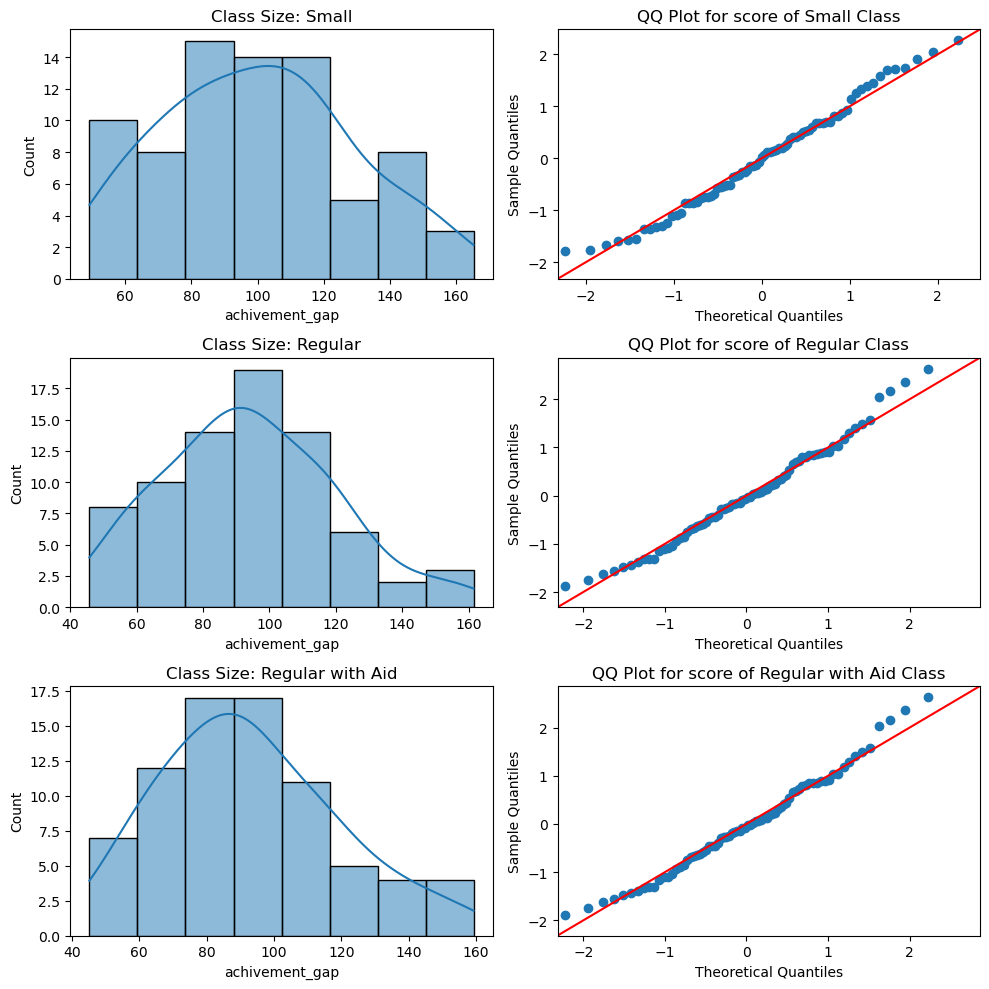

In [128]:
import seaborn as sns
from seaborn_qqplot import pplot
import statsmodels.api as sm
import scipy.stats as stats

fig, axes = plt.subplots(3, 2, figsize=(10, 10))

sns.histplot(achivement_gap_df, x=achivement_gap_df[achivement_gap_df['class_type'] == 'small.class']['achivement_gap'], kde=True, ax=axes[0][0])
axes[0][0].set_title('Class Size: Small')

sm.qqplot(achivement_gap_df[achivement_gap_df['class_type'] == 'small.class']['achivement_gap'], line='45',fit=True,dist=stats.norm, ax=axes[0][1])
axes[0][1].set_title('QQ Plot for score of Small Class')

sns.histplot(achivement_gap_df, x=achivement_gap_df[achivement_gap_df['class_type'] == 'regular']['achivement_gap'], kde=True, ax=axes[1][0])
axes[1][0].set_title('Class Size: Regular')

sm.qqplot(achivement_gap_df[achivement_gap_df['class_type'] == 'regular']['achivement_gap'], line='45',fit=True,dist=stats.norm, ax=axes[1][1])
axes[1][1].set_title('QQ Plot for score of Regular Class')

sns.histplot(achivement_gap_df, x=achivement_gap_df[achivement_gap_df['class_type'] == 'regular.with.aide']['achivement_gap'], kde=True, ax=axes[2][0])
axes[2][0].set_title('Class Size: Regular with Aid')

sm.qqplot(achivement_gap_df[achivement_gap_df['class_type'] == 'regular']['achivement_gap'], line='45',fit=True,dist=stats.norm, ax=axes[2][1])
axes[2][1].set_title('QQ Plot for score of Regular with Aid Class')

plt.tight_layout()
plt.show()

TypeError: 'Figure' object is not subscriptable

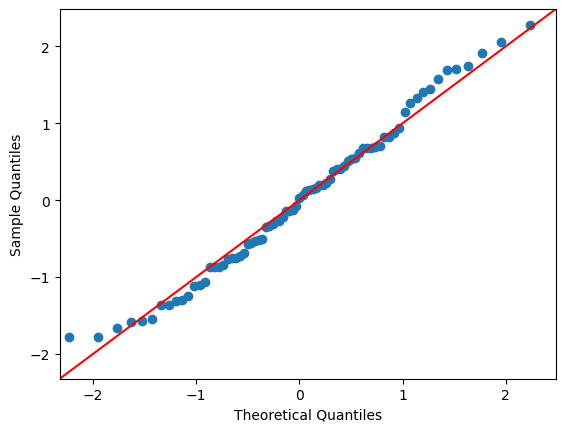

In [129]:
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.api as sm
import scipy.stats as stats

# Assuming achivement_gap_df is a DataFrame containing the necessary data

# Create subplots
fig = sp.make_subplots(rows=3, cols=2,
                       subplot_titles=['Class Size: Small', 'QQ Plot for score of Small Class',
                                       'Class Size: Regular', 'QQ Plot for score of Regular Class',
                                       'Class Size: Regular with Aid', 'QQ Plot for score of Regular with Aid Class'],
                       horizontal_spacing=0.1, vertical_spacing=0.2)

# Plot histograms for small class size
small_class_hist = px.histogram(achivement_gap_df[achivement_gap_df['class_type'] == 'small.class'],
                                x='achivement_gap', nbins=30, histnorm='probability density')
fig.add_trace(go.Scatter(x=small_class_hist.data[0].x, y=small_class_hist.data[0].y,
                         mode='markers', marker=dict(color='blue'), opacity=0.7),
              row=1, col=1)

# Plot QQ plot for small class size
qq_small_class = sm.qqplot(achivement_gap_df[achivement_gap_df['class_type'] == 'small.class']['achivement_gap'],
                           line='45', fit=True, dist=stats.norm)
fig.add_trace(go.Scatter(x=qq_small_class[0], y=qq_small_class[1], mode='markers', marker=dict(color='blue')),
              row=1, col=2)

# Plot histograms for regular class size
regular_class_hist = px.histogram(achivement_gap_df[achivement_gap_df['class_type'] == 'regular'],
                                  x='achivement_gap', nbins=30, histnorm='probability density')
fig.add_trace(go.Scatter(x=regular_class_hist.data[0].x, y=regular_class_hist.data[0].y,
                         mode='markers', marker=dict(color='green'), opacity=0.7),
              row=2, col=1)

# Plot QQ plot for regular class size
qq_regular_class = sm.qqplot(achivement_gap_df[achivement_gap_df['class_type'] == 'regular']['achivement_gap'],
                             line='45', fit=True, dist=stats.norm)
fig.add_trace(go.Scatter(x=qq_regular_class[0], y=qq_regular_class[1], mode='markers', marker=dict(color='green')),
              row=2, col=2)

# Plot histograms for regular with aid class size
aid_class_hist = px.histogram(achivement_gap_df[achivement_gap_df['class_type'] == 'regular.with.aide'],
                              x='achivement_gap', nbins=30, histnorm='probability density')
fig.add_trace(go.Scatter(x=aid_class_hist.data[0].x, y=aid_class_hist.data[0].y,
                         mode='markers', marker=dict(color='orange'), opacity=0.7),
              row=3, col=1)

# Plot QQ plot for regular with aid class size
qq_aid_class = sm.qqplot(achivement_gap_df[achivement_gap_df['class_type'] == 'regular']['achivement_gap'],
                         line='45', fit=True, dist=stats.norm)
fig.add_trace(go.Scatter(x=qq_aid_class[0], y=qq_aid_class[1], mode='markers', marker=dict(color='orange')),
              row=3, col=2)

# Update layout
fig.update_layout(height=800, width=800, title_text="Histograms and QQ Plots for Achievement Gap")
fig.update_xaxes(title_text="Achievement Gap", row=3, col=1)
fig.update_xaxes(title_text="Theoretical Quantiles", row=3, col=2)

# Show the plot
fig.show()


In [130]:
from scipy.stats import levene

# Perform Levene's test
statistic, p_value = levene(achivement_gap_df[achivement_gap_df['class_type'] == 'small.class']['achivement_gap'], 
                            achivement_gap_df[achivement_gap_df['class_type'] == 'regular']['achivement_gap'],
                            achivement_gap_df[achivement_gap_df['class_type'] == 'regular.with.aide']['achivement_gap']
                            )

# Display the results
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# The null hypothesis of Levene's test is that the variances are equal across all groups. 
# A small p-value suggests that there is evidence to reject the null hypothesis, indicating 
# that at least one group has a different variance.

Statistic: 0.9033267965949597
P-value: 0.4066708894820553


In [135]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Perform Tukey's HSD post hoc test
tukey_result = pairwise_tukeyhsd(achivement_gap_df['achivement_gap'], achivement_gap_df['class_type'])

# Display the results
print(tukey_result)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------
          regular regular.with.aide  -1.2441 0.9562 -11.5348  9.0465  False
          regular       small.class   6.1663 0.3355  -4.1244 16.4569  False
regular.with.aide       small.class   7.4104 0.2057  -2.8466 17.6674  False
---------------------------------------------------------------------------


In [136]:
spc_format = ols('achivement_gap ~ class_type', data=achivement_gap_df[['achivement_gap', 'class_type']]).fit()

sm.stats.anova_lm(spc_format)

,df,sum_sq,mean_sq,F,PR(>F)
class_type,2.0,2422.410083,1211.205042,1.664353,0.191615
Residual,227.0,165195.480796,727.733396,NaN,NaN


# Effect of FreeLunch on performance

In [137]:
df.head()

,rownames,scaled_math_score,scaled_reading_score,class_type,teaching_exp,sex,free_lunch,race,sid,teaching_exp_uniform,teaching_exp_quantile,teaching_exp_kmeans,scaled_combined_score,top_10,bottom_10
0,2,473,447,small.class,7,girl,no,white,63,1.0,1.0,1.0,460.0,False,False
1,3,536,450,small.class,21,girl,no,black,20,3.0,4.0,3.0,493.0,False,False
2,5,463,439,regular.with.aide,0,boy,yes,black,19,0.0,0.0,0.0,451.0,False,False
3,11,559,448,regular,16,boy,no,white,69,2.0,4.0,3.0,503.5,False,False
4,12,489,447,small.class,5,boy,yes,white,79,0.0,1.0,0.0,468.0,False,False


In [138]:
spc_format = ols('scaled_combined_score ~ free_lunch', data=df[['scaled_combined_score', 'free_lunch']]).fit()

sm.stats.anova_lm(spc_format)

,df,sum_sq,mean_sq,F,PR(>F)
free_lunch,1.0,5.755700e+05,575569.977475,455.174907,2.938470e-97
Residual,5746.0,7.265834e+06,1264.502873,NaN,NaN


In [139]:
df[df["free_lunch"] == "no"]["scaled_combined_score"]

0       460.0
1       493.0
3       503.5
7       475.5
8       458.5
        ...  
5741    566.5
5742    466.0
5743    445.0
5744    521.0
5747    435.0
Name: scaled_combined_score, Length: 2973, dtype: float64

In [140]:
from scipy.stats import ttest_ind

group1 = df[df["free_lunch"] == "yes"]["scaled_combined_score"]
group2 = df[df["free_lunch"] == "no"]["scaled_combined_score"]

t_statistic, p_value = ttest_ind(group1, group2)

In [141]:
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference between the two groups is statistically significant.")
else:
    print("There is no statistically significant difference between the two groups.")

T-statistic: -21.334828491868393
P-value: 2.938469820509842e-97
The difference between the two groups is statistically significant.


In [142]:
print(f"The mean score of students qualified for free meal is {group1.mean()} and not is {group2.mean()}")

The mean score of students qualified for free meal is 450.83765765765764 and not is 470.8629330642449


# Class effect on race

In [143]:
df.head()

,rownames,scaled_math_score,scaled_reading_score,class_type,teaching_exp,sex,free_lunch,race,sid,teaching_exp_uniform,teaching_exp_quantile,teaching_exp_kmeans,scaled_combined_score,top_10,bottom_10
0,2,473,447,small.class,7,girl,no,white,63,1.0,1.0,1.0,460.0,False,False
1,3,536,450,small.class,21,girl,no,black,20,3.0,4.0,3.0,493.0,False,False
2,5,463,439,regular.with.aide,0,boy,yes,black,19,0.0,0.0,0.0,451.0,False,False
3,11,559,448,regular,16,boy,no,white,69,2.0,4.0,3.0,503.5,False,False
4,12,489,447,small.class,5,boy,yes,white,79,0.0,1.0,0.0,468.0,False,False


In [144]:
model = ols('scaled_combined_score ~ C(class_type) + C(race) +\
            C(class_type):C(race)', data=df).fit() 
sm.stats.anova_lm(model, typ=2) 

,sum_sq,df,F,PR(>F)
C(class_type),5.463163e+04,2.0,20.864192,9.366554e-10
C(race),2.679669e+05,2.0,102.338382,2.134023e-44
C(class_type):C(race),1.861682e+03,4.0,0.355494,8.403538e-01
Residual,7.513614e+06,5739.0,NaN,NaN


In [145]:
model = ols('scaled_combined_score ~ C(class_type) + C(sex) +\
            C(class_type):C(sex)', data=df).fit() 
sm.stats.anova_lm(model, typ=2) 

,sum_sq,df,F,PR(>F)
C(class_type),5.799640e+04,2.0,21.632525,4.368492e-10
C(sex),6.874993e+04,1.0,51.287141,8.981350e-13
C(class_type):C(sex),1.759474e+04,2.0,6.562798,1.422544e-03
Residual,7.697097e+06,5742.0,NaN,NaN


# checking for significance

In [146]:
small_class_girl_score = df[(df["class_type"] == "small.class") & (df['sex'] == 'girl')]["scaled_combined_score"]
small_class_boy_score = df[(df["class_type"] == "small.class") & (df['sex'] == 'boy')]["scaled_combined_score"]

t_statistic, p_value = ttest_ind(small_class_girl_score, small_class_boy_score)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.01  # significance level
if p_value < alpha:
    print("The difference between the two groups is statistically significant.")
else:
    print("There is no statistically significant difference between the two groups.")

print(f"\nThe mean score for girls in small class {small_class_girl_score.mean()} and for boys in small class is {small_class_boy_score.mean()}")

T-statistic: 1.8597357003421364
P-value: 0.06309246068571991
There is no statistically significant difference between the two groups.

The mean score for girls in small class 467.78028503562945 and for boys in small class is 464.36700336700335


In [147]:
regular_class_girl_score = df[(df["class_type"] == "regular") & (df['sex'] == 'girl')]["scaled_combined_score"]
regular_class_boy_score = df[(df["class_type"] == "regular") & (df['sex'] == 'boy')]["scaled_combined_score"]

t_statistic, p_value = ttest_ind(regular_class_girl_score, regular_class_boy_score)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.01  # significance level
if p_value < alpha:
    print("The difference between the two groups is statistically significant.")
else:
    print("There is no statistically significant difference between the two groups.")

print(f"\nThe mean score for girls in regular class {regular_class_girl_score.mean()} and for boys in regular class is {regular_class_boy_score.mean()}")

T-statistic: 7.176771428293762
P-value: 1.0017674896636543e-12
The difference between the two groups is statistically significant.

The mean score for girls in regular class 464.9326131687243 and for boys in regular class is 453.3341439688716


In [148]:
regular_with_aid_class_girl_score = df[(df["class_type"] == "regular.with.aide") & (df['sex'] == 'girl')]["scaled_combined_score"]
regular_with_aid_class_boy_score = df[(df["class_type"] == "regular.with.aide") & (df['sex'] == 'boy')]["scaled_combined_score"]

t_statistic, p_value = ttest_ind(regular_with_aid_class_girl_score, regular_with_aid_class_boy_score)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.01  # significance level
if p_value < alpha:
    print("The difference between the two groups is statistically significant.")
else:
    print("There is no statistically significant difference between the two groups.")

print(f"\nThe mean score for girls in regular class with aid {regular_with_aid_class_girl_score.mean()} and for boys in regular class with aid is {regular_with_aid_class_boy_score.mean()}")

T-statistic: 3.3250605820745864
P-value: 0.0008998637697378906
The difference between the two groups is statistically significant.

The mean score for girls in regular class with aid 461.96632653061226 and for boys in regular class with aid is 456.6753623188406


In [149]:
model = ols('scaled_combined_score ~ C(class_type) + C(free_lunch) +\
            C(class_type):C(free_lunch)', data=df).fit() 
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(class_type),5.397023e+04,2.0,21.485562,5.054530e-10
C(free_lunch),5.715789e+05,1.0,455.091364,3.072137e-97
C(class_type):C(free_lunch),1.118483e+02,2.0,0.044527,9.564502e-01
Residual,7.211751e+06,5742.0,NaN,NaN


In [151]:
df.head()

,rownames,scaled_math_score,scaled_reading_score,class_type,teaching_exp,sex,free_lunch,race,sid,teaching_exp_uniform,teaching_exp_quantile,teaching_exp_kmeans,scaled_combined_score,top_10,bottom_10
0,2,473,447,small.class,7,girl,no,white,63,1.0,1.0,1.0,460.0,False,False
1,3,536,450,small.class,21,girl,no,black,20,3.0,4.0,3.0,493.0,False,False
2,5,463,439,regular.with.aide,0,boy,yes,black,19,0.0,0.0,0.0,451.0,False,False
3,11,559,448,regular,16,boy,no,white,69,2.0,4.0,3.0,503.5,False,False
4,12,489,447,small.class,5,boy,yes,white,79,0.0,1.0,0.0,468.0,False,False


<Axes: xlabel='sid', ylabel='Count'>

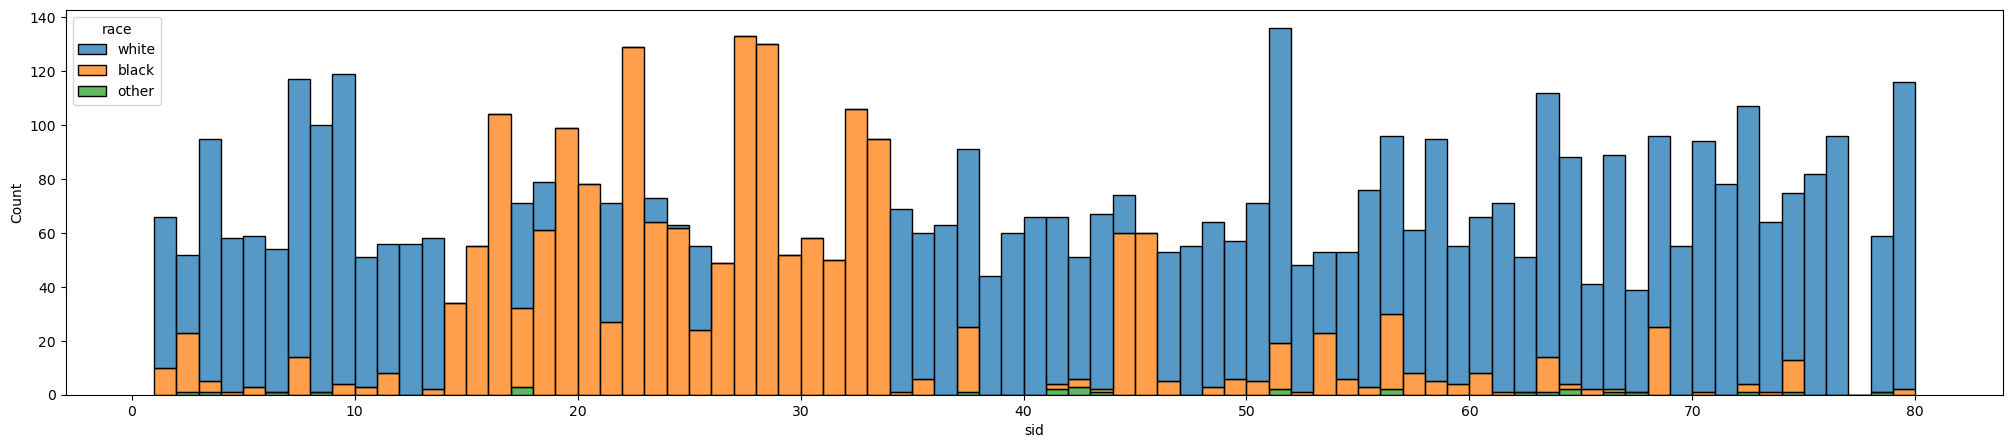

In [152]:
plt.figure(figsize=(25, 5))
sns.histplot(df, x='sid', hue='race', multiple='stack', bins=79)

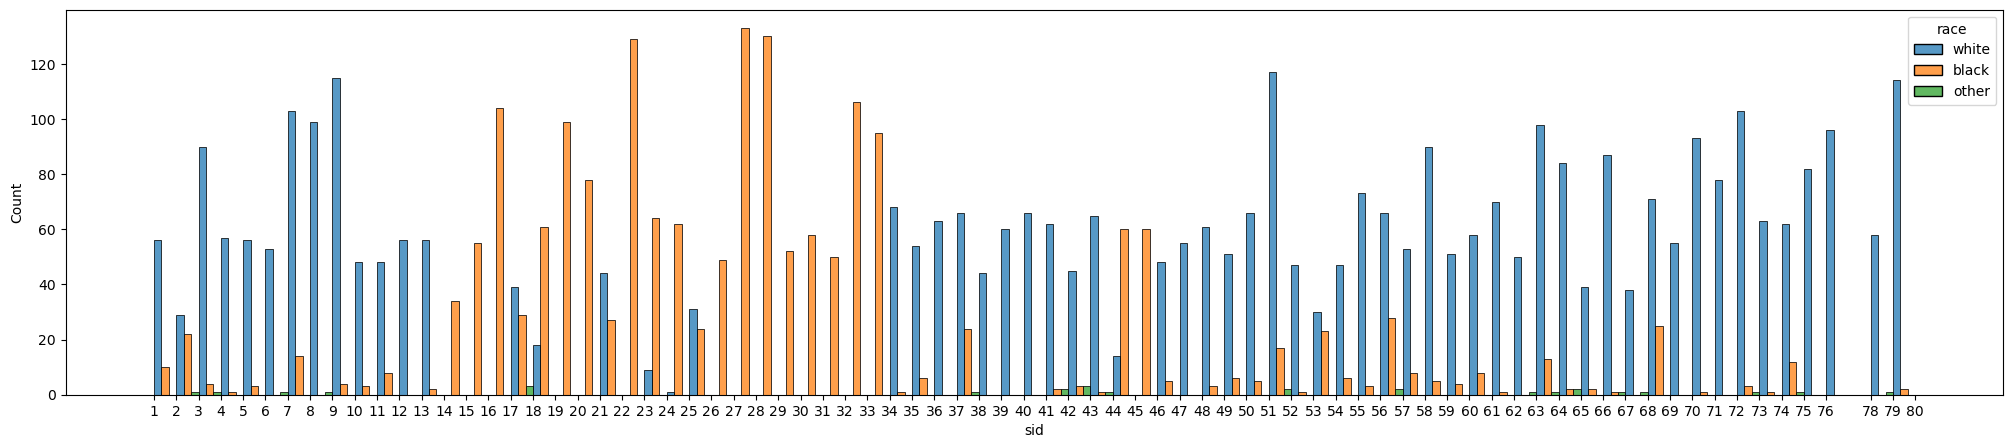

In [153]:
plt.figure(figsize=(25, 5))
sns.histplot(df, x='sid', hue='race', multiple='dodge', bins=79)
plt.xticks(ticks=df.sid.unique());

In [155]:
schools_with_predominat_black = [14, 15, 16, 18, 19, 20, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 44, 45]

def black_dominant(x):
    if x in schools_with_predominat_black:
        return 'black'
    else:
        return 'white'

In [156]:
df['dominant_race'] = df['sid'].apply(black_dominant)

In [157]:
df.head()

,rownames,scaled_math_score,scaled_reading_score,class_type,teaching_exp,sex,free_lunch,race,sid,teaching_exp_uniform,teaching_exp_quantile,teaching_exp_kmeans,scaled_combined_score,top_10,bottom_10,dominant_race
0,2,473,447,small.class,7,girl,no,white,63,1.0,1.0,1.0,460.0,False,False,white
1,3,536,450,small.class,21,girl,no,black,20,3.0,4.0,3.0,493.0,False,False,black
2,5,463,439,regular.with.aide,0,boy,yes,black,19,0.0,0.0,0.0,451.0,False,False,black
3,11,559,448,regular,16,boy,no,white,69,2.0,4.0,3.0,503.5,False,False,white
4,12,489,447,small.class,5,boy,yes,white,79,0.0,1.0,0.0,468.0,False,False,white


In [158]:
black_dominant = df[df["dominant_race"] == "black"]["scaled_combined_score"]
white_dominant = df[df["dominant_race"] == "white"]["scaled_combined_score"]

t_statistic, p_value = ttest_ind(black_dominant, white_dominant)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.01  # significance level
if p_value < alpha:
    print("The difference between the two groups is statistically significant.")
else:
    print("There is no statistically significant difference between the two groups.")

print(f"\nThe mean score of students from black dominant is {black_dominant.mean()} and white dominant is {white_dominant.mean()}")

T-statistic: -10.096958533319205
P-value: 8.987479506901871e-24
The difference between the two groups is statistically significant.

The mean score of students from black dominant is 453.0654174884944 and white dominant is 464.12053465815


In [159]:
print(f"The mean score of students from black dominant is {black_dominant.mean()} and white dominant is {white_dominant.mean()}")

The mean score of students from black dominant is 453.0654174884944 and white dominant is 464.12053465815


In [160]:
spc_format = ols('scaled_combined_score ~ dominant_race', data=df[['scaled_combined_score', 'dominant_race']]).fit()

sm.stats.anova_lm(spc_format)

,df,sum_sq,mean_sq,F,PR(>F)
dominant_race,1.0,1.367009e+05,136700.908922,101.948572,8.987480e-24
Residual,5746.0,7.704703e+06,1340.881061,NaN,NaN


<Axes: xlabel='scaled_combined_score', ylabel='Count'>

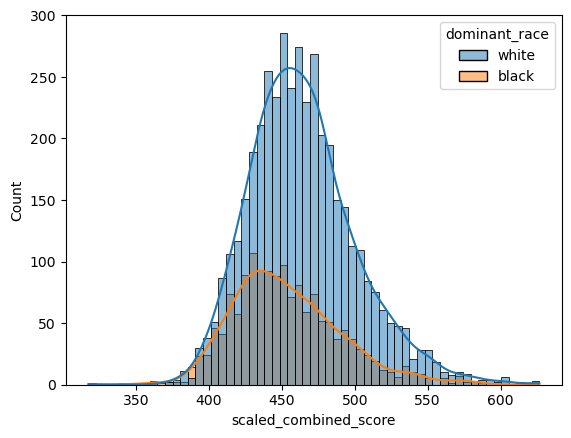

In [161]:
sns.histplot(df, x='scaled_combined_score', hue='dominant_race', kde=True)

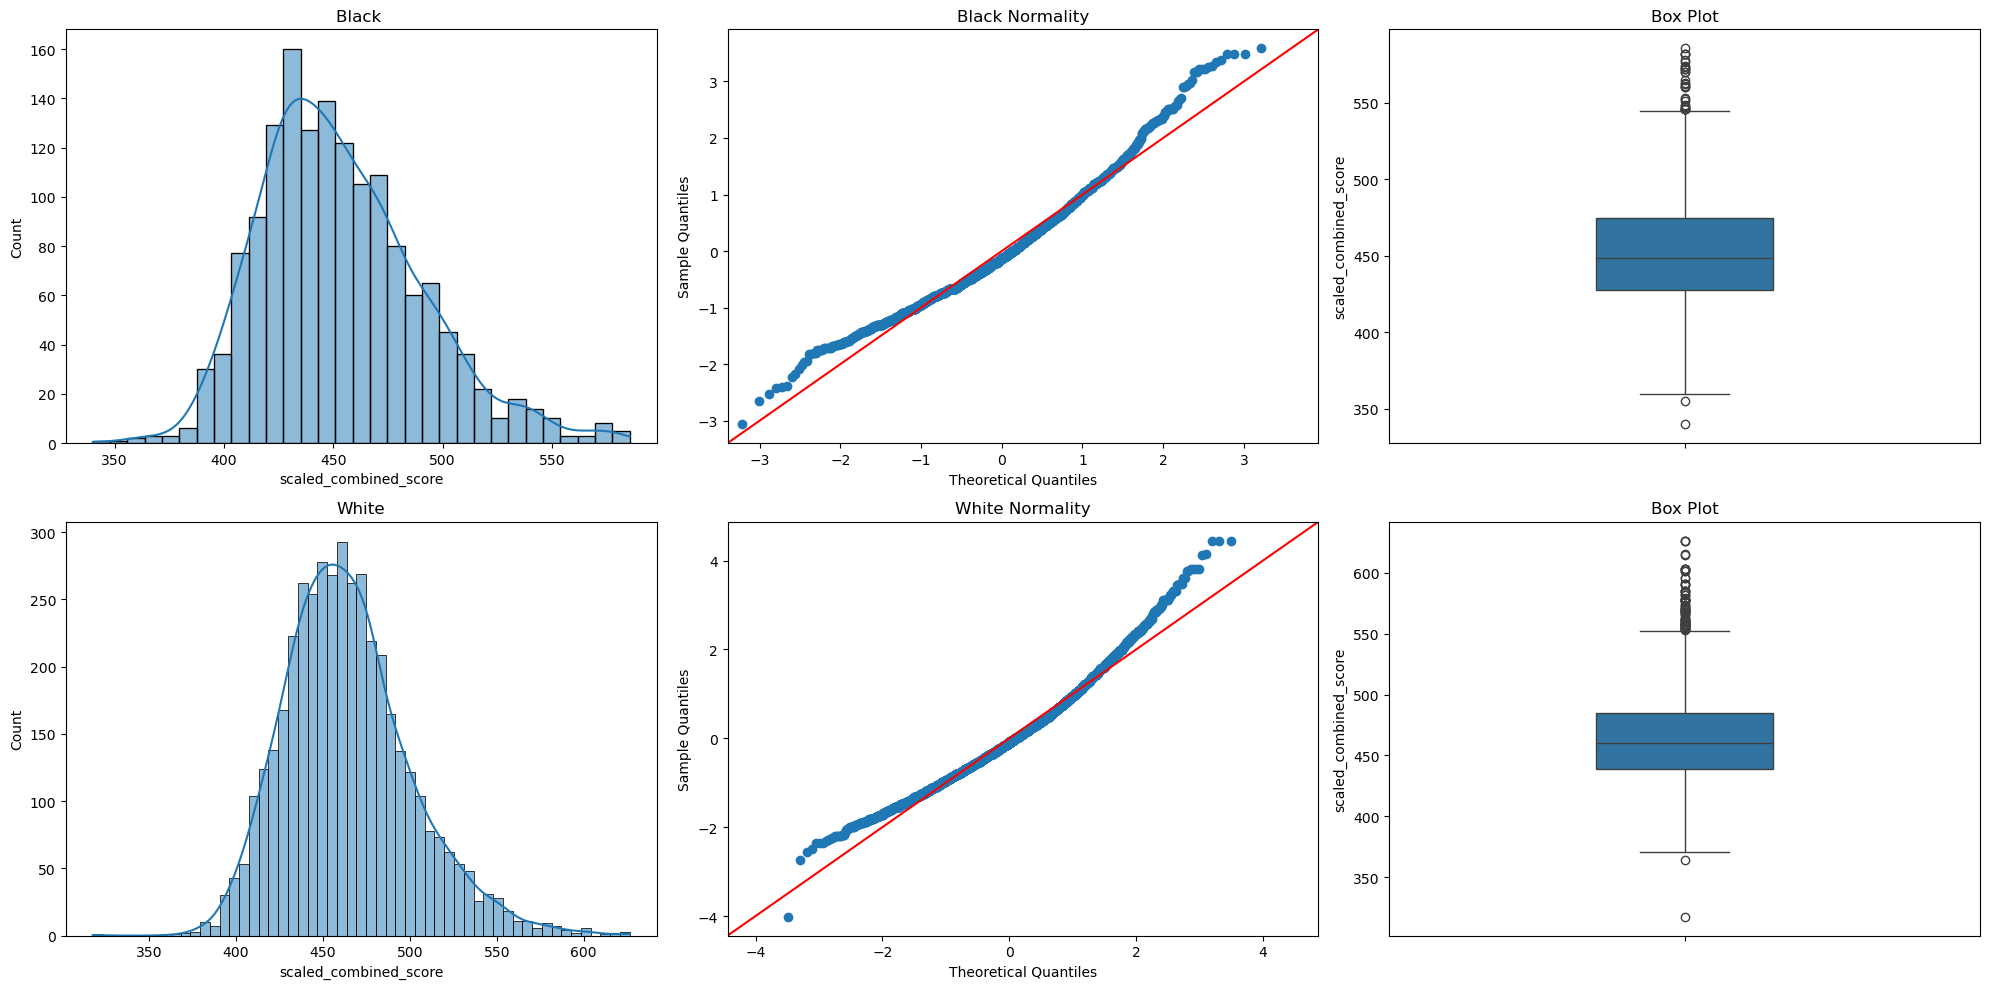

In [162]:
import seaborn as sns
from seaborn_qqplot import pplot
import statsmodels.api as sm
import scipy.stats as stats

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(df, x=df[df['dominant_race'] == 'black']['scaled_combined_score'], kde=True, ax=axes[0][0])
axes[0][0].set_title('Black ')

sm.qqplot(df[df['dominant_race'] == 'black']['scaled_combined_score'], line='45',fit=True,dist=stats.norm, ax=axes[0][1])
axes[0][1].set_title('Black Normality')

sns.boxplot(df[df['dominant_race'] == 'black']['scaled_combined_score'], ax=axes[0][2], width=0.3)
axes[0][2].set_title('Box Plot')

sns.histplot(df, x=df[df['dominant_race'] == 'white']['scaled_combined_score'], kde=True, ax=axes[1][0])
axes[1][0].set_title('White')

sm.qqplot(df[df['dominant_race'] == 'white']['scaled_combined_score'], line='45',fit=True,dist=stats.norm, ax=axes[1][1])
axes[1][1].set_title('White Normality')

sns.boxplot(df[df['dominant_race'] == 'white']['scaled_combined_score'], ax=axes[1][2], width=0.3)
axes[1][2].set_title('Box Plot')

plt.tight_layout()
plt.show()

In [163]:
from scipy.stats import levene

# Perform Levene's test
statistic, p_value = levene(df[df['dominant_race'] == 'white']['scaled_combined_score'], df[df['dominant_race'] == 'black']['scaled_combined_score'])

# Display the results
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# The null hypothesis of Levene's test is that the variances are equal across all groups. 
# A small p-value suggests that there is evidence to reject the null hypothesis, indicating 
# that at least one group has a different variance.

Statistic: 0.691365464461825
P-value: 0.40573487467891167


# Race dominant schools

<Axes: xlabel='scaled_combined_score', ylabel='Count'>

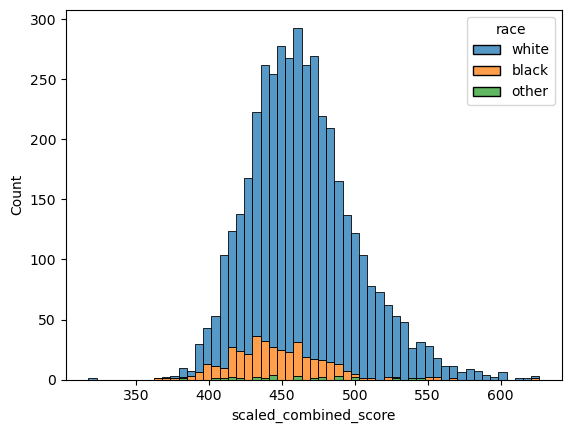

In [164]:
sns.histplot(df, x=df[df['dominant_race'] == 'white']['scaled_combined_score'], hue='race', multiple='stack')

<Axes: xlabel='scaled_combined_score', ylabel='Count'>

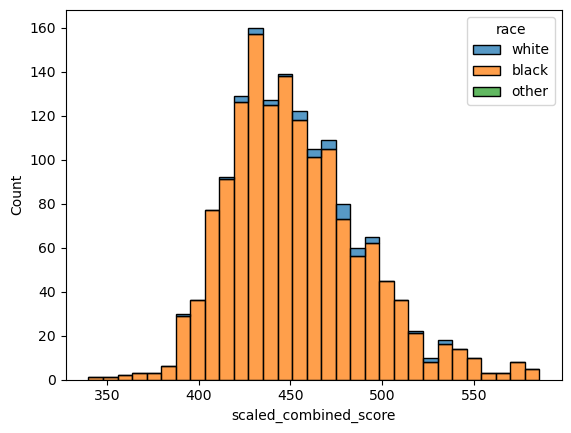

In [165]:
sns.histplot(df, x=df[df['dominant_race'] == 'black']['scaled_combined_score'], hue='race', multiple='stack')

IndexError: index 2 is out of bounds for axis 0 with size 2

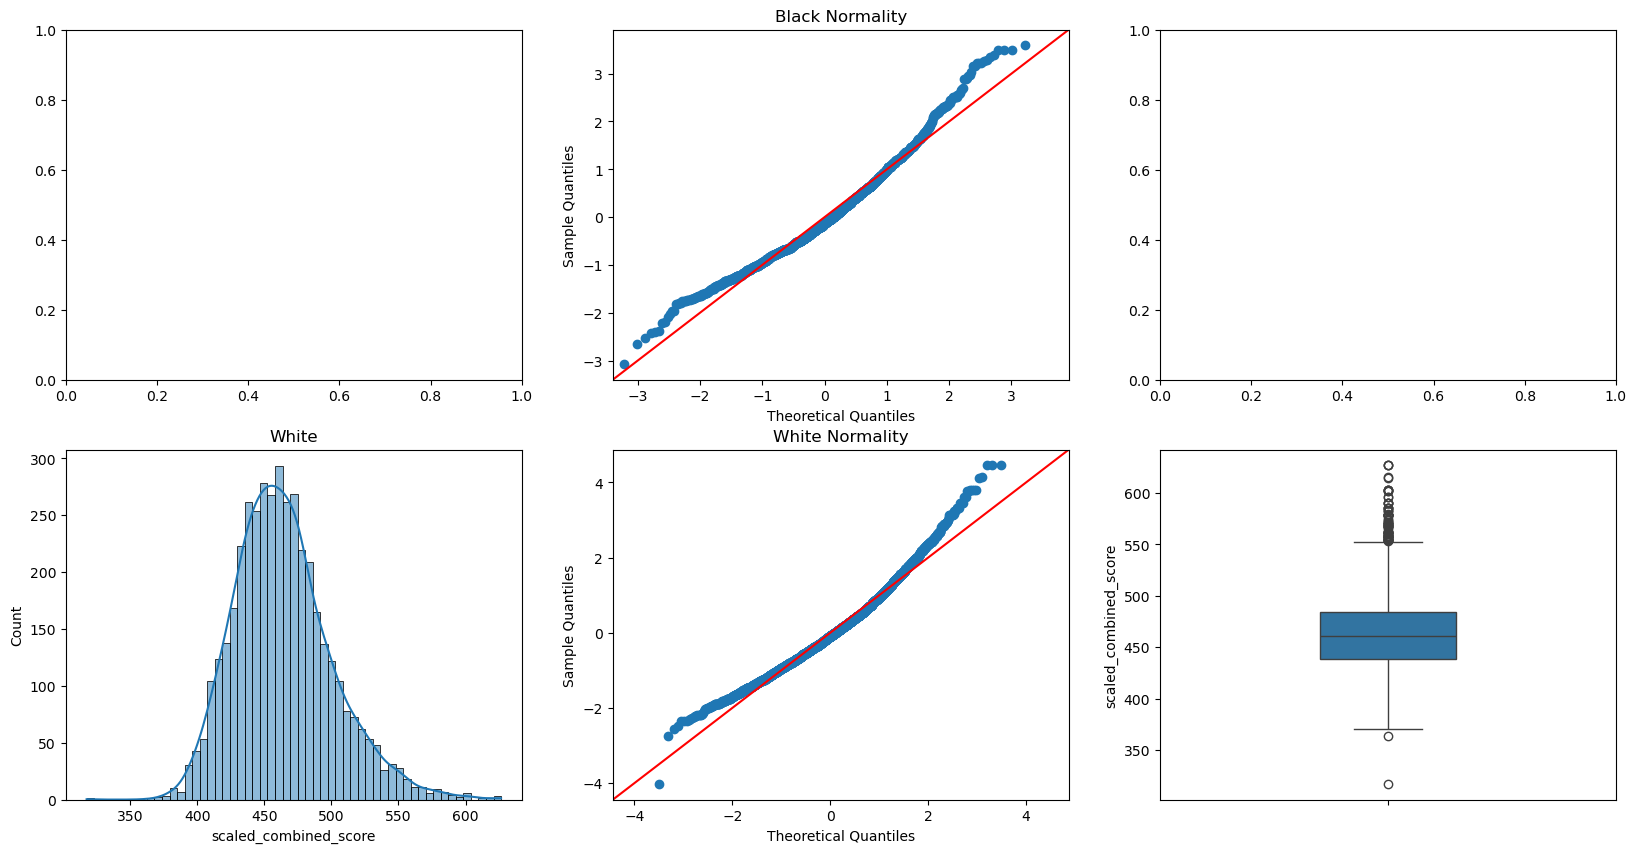

In [166]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

sm.qqplot(df[df['dominant_race'] == 'black']['scaled_combined_score'], line='45',fit=True,dist=stats.norm, ax=axes[0][1])
axes[0][1].set_title('Black Normality')

sns.histplot(df, x=df[df['dominant_race'] == 'white']['scaled_combined_score'], kde=True, ax=axes[1][0])
axes[1][0].set_title('White')

sm.qqplot(df[df['dominant_race'] == 'white']['scaled_combined_score'], line='45',fit=True,dist=stats.norm, ax=axes[1][1])
axes[1][1].set_title('White Normality')

sns.boxplot(df[df['dominant_race'] == 'white']['scaled_combined_score'], ax=axes[1][2], width=0.3)
axes[2][0].set_title('Box Plot')

sns.histplot(df, x=df[df['class_type'] == 'regular']['scaled_combined_score'], kde=True, ax=axes[0][0])
axes[0][0].set_title('Class Size: Regular')

In [167]:
df

,rownames,scaled_math_score,scaled_reading_score,class_type,teaching_exp,sex,free_lunch,race,sid,teaching_exp_uniform,teaching_exp_quantile,teaching_exp_kmeans,scaled_combined_score,top_10,bottom_10,dominant_race
0,2,473,447,small.class,7,girl,no,white,63,1.0,1.0,1.0,460.0,False,False,white
1,3,536,450,small.class,21,girl,no,black,20,3.0,4.0,3.0,493.0,False,False,black
2,5,463,439,regular.with.aide,0,boy,yes,black,19,0.0,0.0,0.0,451.0,False,False,black
3,11,559,448,regular,16,boy,no,white,69,2.0,4.0,3.0,503.5,False,False,white
4,12,489,447,small.class,5,boy,yes,white,79,0.0,1.0,0.0,468.0,False,False,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743,11593,468,422,small.class,6,boy,no,white,62,1.0,1.0,1.0,445.0,False,False,white
5744,11594,559,483,small.class,8,boy,no,white,49,1.0,2.0,1.0,521.0,True,False,white
5745,11595,513,437,regular,0,girl,yes,white,67,0.0,0.0,0.0,475.0,False,False,white
5746,11597,478,431,regular,24,girl,yes,black,22,4.0,4.0,4.0,454.5,False,False,black


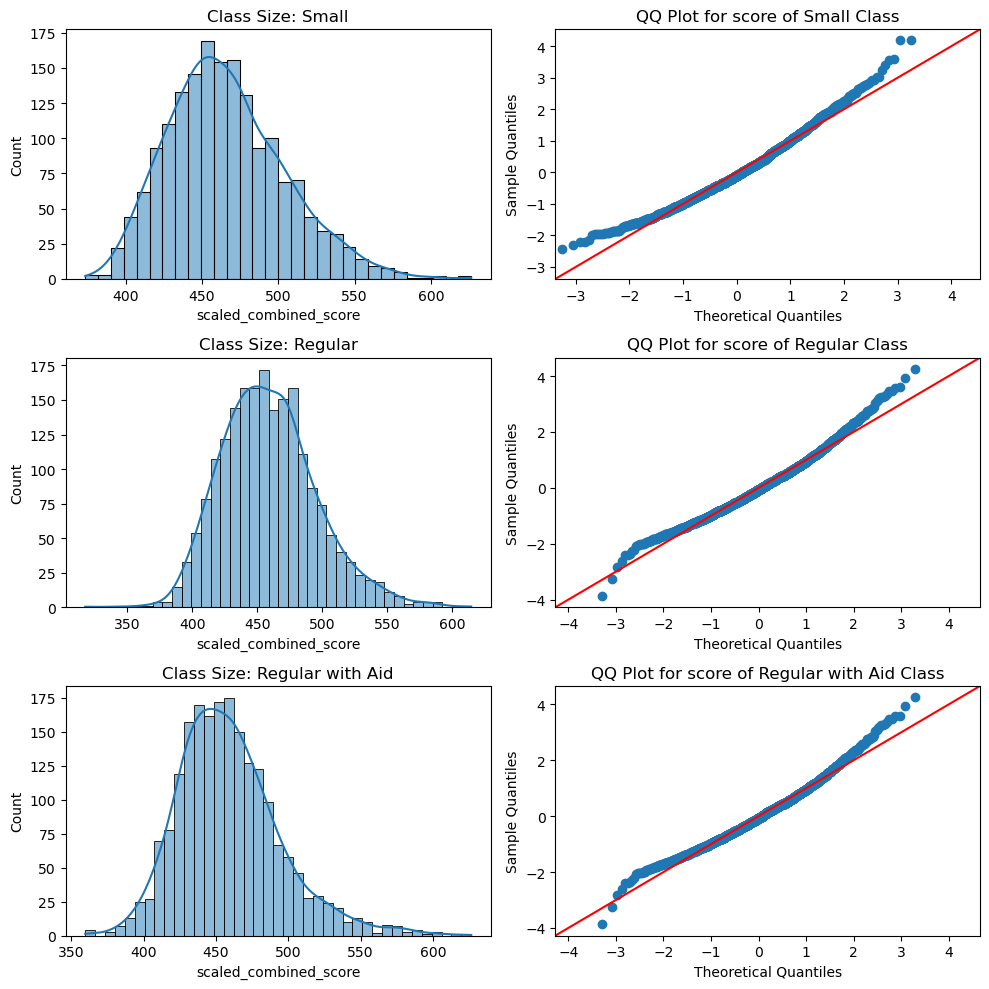

In [168]:
import seaborn as sns
from seaborn_qqplot import pplot
import statsmodels.api as sm
import scipy.stats as stats

fig, axes = plt.subplots(3, 2, figsize=(10, 10))

sns.histplot(df, x=df[df['class_type'] == 'small.class']['scaled_combined_score'], kde=True, ax=axes[0][0])
axes[0][0].set_title('Class Size: Small')

sm.qqplot(df[df['class_type'] == 'small.class']['scaled_combined_score'], line='45',fit=True,dist=stats.norm, ax=axes[0][1])
axes[0][1].set_title('QQ Plot for score of Small Class')

sns.histplot(df, x=df[df['class_type'] == 'regular']['scaled_combined_score'], kde=True, ax=axes[1][0])
axes[1][0].set_title('Class Size: Regular')

sm.qqplot(df[df['class_type'] == 'regular']['scaled_combined_score'], line='45',fit=True,dist=stats.norm, ax=axes[1][1])
axes[1][1].set_title('QQ Plot for score of Regular Class')

sns.histplot(df, x=df[df['class_type'] == 'regular.with.aide']['scaled_combined_score'], kde=True, ax=axes[2][0])
axes[2][0].set_title('Class Size: Regular with Aid')

sm.qqplot(df[df['class_type'] == 'regular']['scaled_combined_score'], line='45',fit=True,dist=stats.norm, ax=axes[2][1])
axes[2][1].set_title('QQ Plot for score of Regular with Aid Class')

plt.tight_layout()
plt.show()

In [169]:
from scipy.stats import levene

# Perform Levene's test
statistic, p_value = levene(df[df['class_type'] == 'small.class']['scaled_combined_score'], 
                            df[df['class_type'] == 'regular']['scaled_combined_score'],
                            df[df['class_type'] == 'regular.with.aide']['scaled_combined_score']
                            )

# Display the results
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# The null hypothesis of Levene's test is that the variances are equal across all groups. 
# A small p-value suggests that there is evidence to reject the null hypothesis, indicating 
# that at least one group has a different variance.

Statistic: 7.266342070923406
P-value: 0.000705102773581642


In [170]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Perform ANOVA
# Assuming you have imported the appropriate library for ANOVA, for example:
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(df['scaled_combined_score'][df['class_type'] == 'small.class'], 
                                df['scaled_combined_score'][df['class_type'] == 'regular'], 
                                df['scaled_combined_score'][df['class_type'] == 'regular.with.aide'])

print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

F-Statistic: 21.390791275258536
P-Value: 5.552856012074825e-10


In [171]:
# Perform Tukey's HSD post hoc test
tukey_result = pairwise_tukeyhsd(df['scaled_combined_score'], df['class_type'])

# Display the results
print(tukey_result)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
      group1            group2      meandiff p-adj lower  upper  reject
-----------------------------------------------------------------------
          regular regular.with.aide   0.2776 0.969 -2.446 3.0013  False
          regular       small.class   7.0544   0.0 4.2225 9.8862   True
regular.with.aide       small.class   6.7768   0.0 3.9498 9.6037   True
-----------------------------------------------------------------------


In [172]:
top_performers

,rownames,scaled_math_score,scaled_reading_score,class_type,teaching_exp,sex,free_lunch,race,sid,teaching_exp_uniform,teaching_exp_quantile,teaching_exp_kmeans,scaled_combined_score,top_performers
0,833,626,565,small.class,14,boy,no,white,1,2.0,4.0,2.0,595.5,1
1,6096,559,487,small.class,14,girl,no,white,1,2.0,4.0,2.0,523.0,1
2,2951,576,458,small.class,14,girl,no,white,1,2.0,4.0,2.0,517.0,1
3,6002,576,456,small.class,14,boy,no,white,1,2.0,4.0,2.0,516.0,1
4,2360,506,507,regular,5,girl,no,white,1,0.0,1.0,0.0,506.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,6537,547,480,small.class,12,girl,yes,white,79,2.0,3.0,2.0,513.5,1
776,9775,528,478,regular,13,girl,no,white,79,2.0,3.0,2.0,503.0,1
777,1441,547,458,regular,13,girl,no,white,79,2.0,3.0,2.0,502.5,1
778,9293,576,424,small.class,5,girl,no,white,79,0.0,1.0,0.0,500.0,1


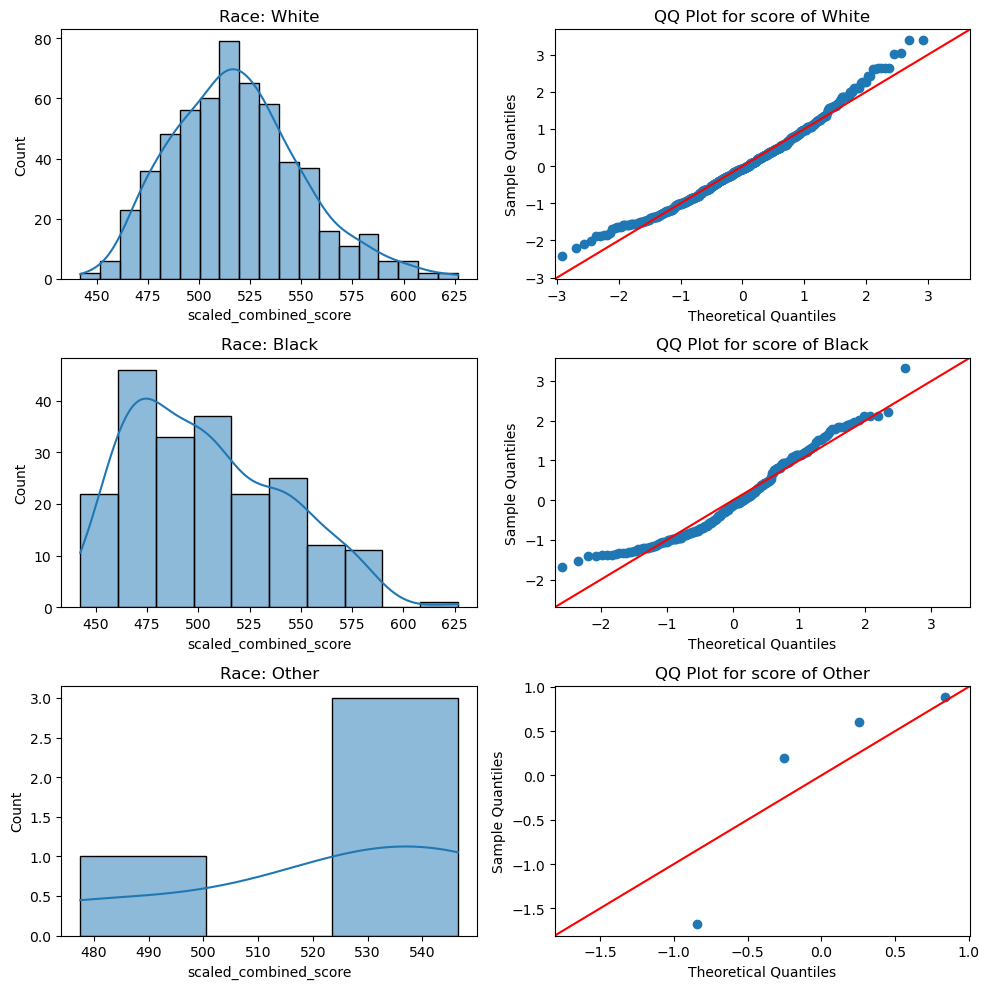

In [173]:
import seaborn as sns
from seaborn_qqplot import pplot
import statsmodels.api as sm
import scipy.stats as stats

fig, axes = plt.subplots(3, 2, figsize=(10, 10))

sns.histplot(df, x=top_performers[top_performers['race'] == 'white']['scaled_combined_score'], kde=True, ax=axes[0][0])
axes[0][0].set_title('Race: White')

sm.qqplot(top_performers[top_performers['race'] == 'white']['scaled_combined_score'], line='45',fit=True,dist=stats.norm, ax=axes[0][1])
axes[0][1].set_title('QQ Plot for score of White')

sns.histplot(df, x=top_performers[top_performers['race'] == 'black']['scaled_combined_score'], kde=True, ax=axes[1][0])
axes[1][0].set_title('Race: Black')

sm.qqplot(top_performers[top_performers['race'] == 'black']['scaled_combined_score'], line='45',fit=True,dist=stats.norm, ax=axes[1][1])
axes[1][1].set_title('QQ Plot for score of Black')

sns.histplot(df, x=top_performers[top_performers['race'] == 'other']['scaled_combined_score'], kde=True, ax=axes[2][0])
axes[2][0].set_title('Race: Other')

sm.qqplot(top_performers[top_performers['race'] == 'other']['scaled_combined_score'], line='45',fit=True,dist=stats.norm, ax=axes[2][1])
axes[2][1].set_title('QQ Plot for score of Other')

plt.tight_layout()
plt.show()

In [174]:
spc_format = ols('scaled_combined_score ~ race', data=top_performers[['scaled_combined_score', 'race']]).fit()

sm.stats.anova_lm(spc_format)

,df,sum_sq,mean_sq,F,PR(>F)
race,2.0,32831.142101,16415.571051,14.868616,4.604099e-07
Residual,777.0,857840.346360,1104.041630,NaN,NaN


In [175]:
# Perform Tukey's HSD post hoc test
tukey_result = pairwise_tukeyhsd(top_performers['scaled_combined_score'], top_performers['race'])

# Display the results
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 black  other  18.6591 0.5066 -20.7246 58.0427  False
 black  white  14.6057    0.0   8.2919 20.9196   True
 other  white  -4.0534 0.9679 -43.2028 35.0961  False
-----------------------------------------------------


In [176]:
from scipy.stats import levene

# Perform Levene's test
statistic, p_value = levene(top_performers[top_performers['race'] == 'white']['scaled_combined_score'], 
                            top_performers[top_performers['race'] == 'black']['scaled_combined_score'],
                            top_performers[top_performers['race'] == 'other']['scaled_combined_score']
                            )

# Display the results
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# The null hypothesis of Levene's test is that the variances are equal across all groups. 
# A small p-value suggests that there is evidence to reject the null hypothesis, indicating 
# that at least one group has a different variance.

Statistic: 5.473054365624584
P-value: 0.004361839557967633


In [177]:
df

,rownames,scaled_math_score,scaled_reading_score,class_type,teaching_exp,sex,free_lunch,race,sid,teaching_exp_uniform,teaching_exp_quantile,teaching_exp_kmeans,scaled_combined_score,top_10,bottom_10,dominant_race
0,2,473,447,small.class,7,girl,no,white,63,1.0,1.0,1.0,460.0,False,False,white
1,3,536,450,small.class,21,girl,no,black,20,3.0,4.0,3.0,493.0,False,False,black
2,5,463,439,regular.with.aide,0,boy,yes,black,19,0.0,0.0,0.0,451.0,False,False,black
3,11,559,448,regular,16,boy,no,white,69,2.0,4.0,3.0,503.5,False,False,white
4,12,489,447,small.class,5,boy,yes,white,79,0.0,1.0,0.0,468.0,False,False,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743,11593,468,422,small.class,6,boy,no,white,62,1.0,1.0,1.0,445.0,False,False,white
5744,11594,559,483,small.class,8,boy,no,white,49,1.0,2.0,1.0,521.0,True,False,white
5745,11595,513,437,regular,0,girl,yes,white,67,0.0,0.0,0.0,475.0,False,False,white
5746,11597,478,431,regular,24,girl,yes,black,22,4.0,4.0,4.0,454.5,False,False,black


In [178]:
df['top_10'] = df.groupby(['race', 'sid'])['scaled_combined_score'].transform(lambda x: x >= x.quantile(0.9))
df['bottom_10'] = df.groupby(['race', 'sid'])['scaled_combined_score'].transform(lambda x: x >= x.quantile(0.1))

In [179]:
df[df['top_10']]['race'].value_counts(normalize=True)

race
white    0.631184
black    0.340330
other    0.028486
Name: proportion, dtype: float64

In [180]:
df[df['bottom_10']]['race'].value_counts(normalize=True)

race
white    0.675350
black    0.320568
other    0.004082
Name: proportion, dtype: float64

In [181]:
df[df['race'] == 'black']['scaled_combined_score'].nlargest(10).mean() - df[df['race'] == 'white']['scaled_combined_score'].nlargest(10).mean()

-26.59999999999991

In [182]:
from scipy.stats import ttest_ind

In [183]:
black_top_10 = df[df['race'] == 'black']['scaled_combined_score'].nlargest(10).mean()
white_top_10 = df[df['race'] == 'white']['scaled_combined_score'].nlargest(10).mean()

t_statistic, p_value = ttest_ind(black_dominant, white_dominant)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.01  # significance level
if p_value < alpha:
    print("The difference between the two groups is statistically significant.")
else:
    print("There is no statistically significant difference between the two groups.")

print(f"\nThe mean score of students from black top 10 is {black_dominant.mean()} and white top 10 is {white_dominant.mean()}")

T-statistic: -10.096958533319205
P-value: 8.987479506901871e-24
The difference between the two groups is statistically significant.

The mean score of students from black top 10 is 453.0654174884944 and white top 10 is 464.12053465815


In [184]:
black_top_10 = df[df['race'] == 'black']['scaled_combined_score'].nsmallest(10).mean()
white_top_10 = df[df['race'] == 'white']['scaled_combined_score'].nsmallest(10).mean()

t_statistic, p_value = ttest_ind(black_dominant, white_dominant)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.01  # significance level
if p_value < alpha:
    print("The difference between the two groups is statistically significant.")
else:
    print("There is no statistically significant difference between the two groups.")

print(f"\nThe mean score of students from black top 10 is {black_dominant.mean()} and white top 10 is {white_dominant.mean()}")

T-statistic: -10.096958533319205
P-value: 8.987479506901871e-24
The difference between the two groups is statistically significant.

The mean score of students from black top 10 is 453.0654174884944 and white top 10 is 464.12053465815
